In [291]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [292]:
import os
import pickle
from collections import defaultdict
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import matplotlib as mpl
import tskit as tsk

from bgspy.theory import bgs_segment, bgs_segment_sc16
from bgspy.utils import bin_chrom


In [293]:
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 200

## Diversity along the chromosome in region simulations

When comparing theory to simulations, we must be mindful that the theory is modeling the reduction *at the middle of the chromosome*. We can see why this is important by taking a subset of the tree sequences from simulations with the same parameters and looking at windowed average diversity: 

In [214]:
tree_dir = '../data/slim_sims/region/tree_subset/'
tree_files = os.listdir(tree_dir)

L = 100_000
N = 1_000
bins = bin_chrom(L, 1000)

pi = [tsk.load(os.path.join(tree_dir, f)).diversity(windows=bins, mode='branch') for f in tree_files]

In [224]:
L/2, midpoints.shape

(50000.0, (100,))

Text(0.5, 0, 'position')

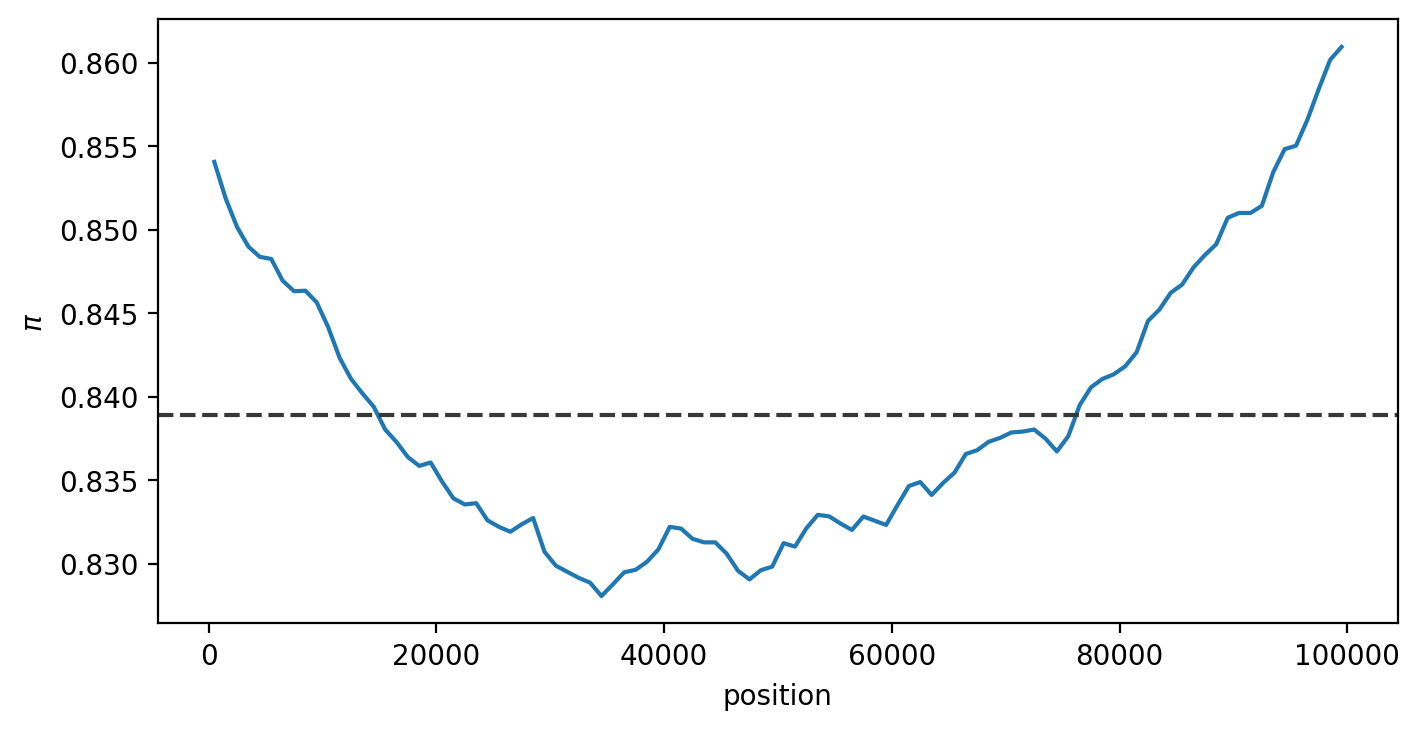

In [220]:
midpoints = (bins[1:] + bins[:-1])/2
plt.plot(midpoints, np.stack(pi).mean(axis=0)/(4*N))
plt.axhline(np.mean(pi)/(4*N), c='0.22', linestyle='dashed')
plt.ylabel("$\pi$")
plt.xlabel("position")

## Analysis of Simulation Results

In [294]:
## params for all sims, fixed across everything
rbp = 1e-8
L = 50_000 # total region length
N = 1000

In [295]:
d = pd.read_pickle('../data/slim_sims/region/region_results.pkl')
d.head()

,generation,k_mean,k_sd,k3,k4,f_mean,f_sd,f3,f4,s,...,B_middle,ratchet,sh,N,rbp,mu,U,r2sum,ldsum,ldn
0,9991,5.672,2.164050,0.260849,47.444700,0.998209,0.000683,-7.906440e-12,4.702630e-13,2,...,0.698212,"[[1, 0], [11, 0], [21, 0], [31, 0], [41, 0], [...",0.000316,1000,1.000000e-08,1.000000e-08,0.001000,9.089089,0.433346,34
1,9991,0.000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0,...,0.853508,"[[1, 0], [11, 0], [21, 0], [31, 0], [41, 0], [...",0.000010,1000,1.000000e-08,1.000000e-10,0.000010,0.000000,0.000000,0
2,9991,0.000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0,...,0.769276,"[[1, 0], [11, 0], [21, 0], [31, 0], [41, 0], [...",0.000032,1000,1.000000e-08,3.160000e-10,0.000032,0.000000,0.000000,0
3,9991,0.001,0.031623,0.000997,0.000996,0.999900,0.003162,-9.970020e-07,9.960060e-08,0,...,1.156344,"[[1, 0], [11, 0], [21, 0], [31, 0], [41, 0], [...",0.100000,1000,1.000000e-08,3.160000e-10,0.000032,0.000000,0.000000,0
4,9991,0.355,0.532220,0.170893,0.260478,0.999965,0.000053,-1.708930e-13,2.604780e-17,4,...,0.387827,"[[1, 0], [11, 0], [21, 0], [31, 0], [41, 0], [...",0.000100,1000,1.000000e-08,1.000000e-09,0.000100,0.000127,-0.000102,6


In [296]:
# average across replicates
dg = d.groupby(['sh', 'rbp', 'N', 'mu', 'U']).mean().reset_index()

In [297]:
dg['sh'].unique(), dg['mu'].unique(), dg['rbp'].unique()

(array([1.00e-05, 3.16e-05, 1.00e-04, 3.16e-04, 1.00e-03, 3.16e-03,
        1.00e-02, 3.16e-02, 1.00e-01]),
 array([1.00e-10, 3.16e-10, 1.00e-09, 3.16e-09, 1.00e-08]),
 array([1.e-08]))

### Diversity 

In [298]:
from bgspy.theory import bgs_rec, bgs_rec_sc16, bgs_segment_full

/tmp/ipykernel_77201/1173211816.py:19: RuntimeWarning: overflow encountered in expm1
  start_T = np.expm1(4*N*sh) / (4*U*sh*N)
/tmp/ipykernel_77201/1173211816.py:29: RuntimeWarning: overflow encountered in expm1
  new_T = np.log(np.expm1(4*N*sh) / (4*U*sh*N))
/tmp/ipykernel_77201/1173211816.py:30: RuntimeWarning: invalid value encountered in double_scalars
  return [new_T - np.log(T),
/tmp/ipykernel_77201/1173211816.py:42: UserWarning: no solution found!
  warnings.warn("no solution found!")
/tmp/ipykernel_77201/1173211816.py:19: RuntimeWarning: overflow encountered in expm1
  start_T = np.expm1(4*N*sh) / (4*U*sh*N)
/tmp/ipykernel_77201/1173211816.py:29: RuntimeWarning: overflow encountered in expm1
  new_T = np.log(np.expm1(4*N*sh) / (4*U*sh*N))
/tmp/ipykernel_77201/1173211816.py:30: RuntimeWarning: invalid value encountered in double_scalars
  return [new_T - np.log(T),
/tmp/ipykernel_77201/1173211816.py:42: UserWarning: no solution found!
  warnings.warn("no solution found!")


(0.9, 1.01)

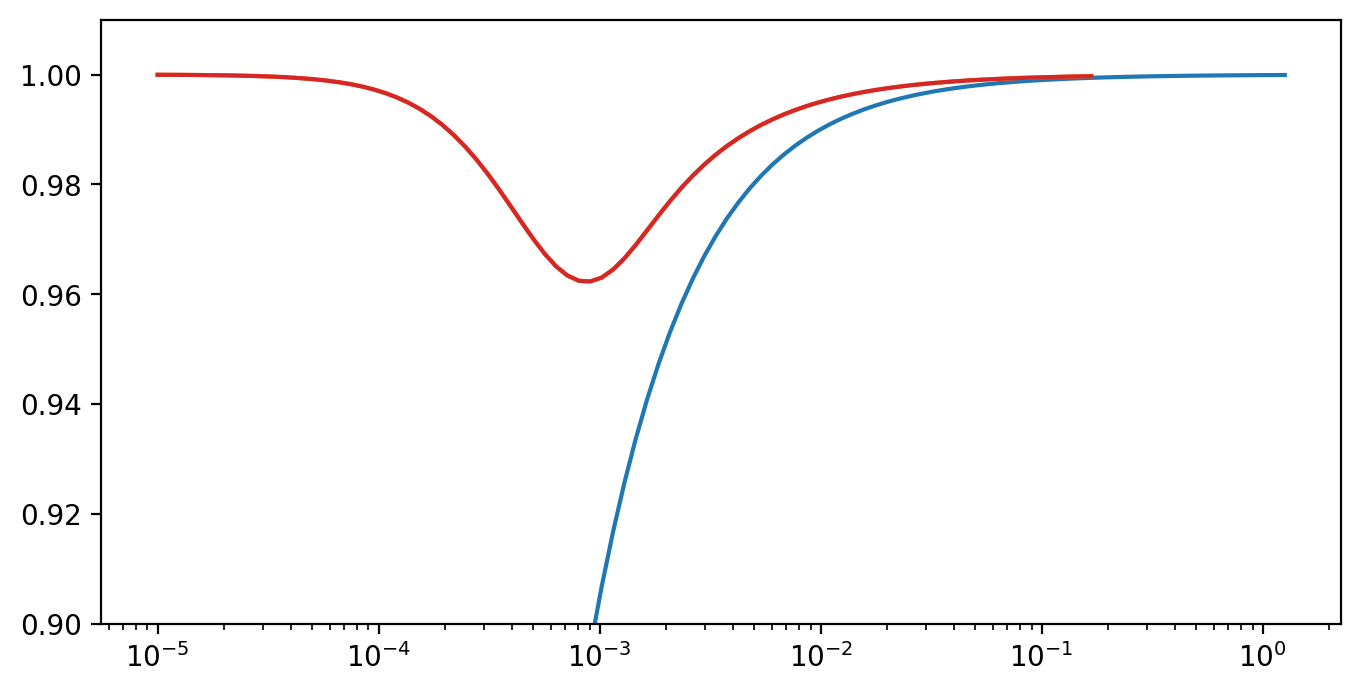

In [92]:
from bgspy.theory import bgs_rec, bgs_rec_sc16, bgs_segment_full
from scipy.optimize import fsolve
plt.plot(x, bgs_rec(1e-8, x, 10000, 1e-8))
plt.plot(x, bgs_segment_sc162(1e-8, x, 10000, 1e-8, 1000)/1000, False)
plt.plot(x, bgs_segment_sc162(1e-8, x, 10000, 1e-8, 1000)/1000, True)
plt.semilogx()
plt.ylim(0.9, 1.01)

In [545]:
from scipy.integrate import quad

In [623]:
V, Vm = 0.1, 0.01
Z = 1 - Vm/V
r = 0.01
t = 10000
(1 - (1 - r)**t * Z**(t+1) + (1 - r)**t * r * Z**(t+1))/(1 - Z + r*Z), np.sum((1-r)**np.arange(t) * (1-Vm/V)**np.arange(t))

(1.8909999999999998, 1.0)

In [625]:
#[(1 - (1 - r)**t * Z**(t+1) + (1 - r)**t * r * Z**(t+1))/(1 - Z + r*Z) for t in np.arange(t)]

In [907]:
def Q2_sum_integral(Z, L, tmax=1000, thresh=0.01, use_sum=False):
    ts = np.arange(tmax)
    last = None
    asymptoted = False
    vals = []
    for t in ts:
        if not asymptoted:
            if use_sum:
                integrand = quad(lambda r: np.sum((1-r)**np.arange(t) * Z**np.arange(t))**2, 0, L/2)[0]
            else:
                integrand = quad(lambda r: ((1 - (1 - r)**t * Z**(t+1) + (1 - r)**t * r * Z**(t+1))/(1 - Z + r*Z))**2, 0, L/2)[0]
            if last is not None and last > 0:
                if (integrand-last)/last < thresh:
                    asymptoted = True
            else:
                last = integrand
        else:
            integrand = last
        vals.append(integrand)    
    
    return (2/L)*np.array(vals)

In [1017]:
gamma(0)

inf

In [1018]:
gamma(0)

inf

In [1026]:
def Gamma(a, z):
    if a == 0:
        return -expi(-z)
    return gamma(a)*gammaincc(a, z)

In [1065]:
from scipy.special import expi, gammaincc, gamma

def Q2_sum_integral2(Z, L, tmax=1000, thresh=0.01, use_sum=False):
    ts = np.arange(tmax)
    Log = np.log
    Power = lambda x, y: x**y
    E = np.exp(1)
    vals = []
    k = 1-Z
    for t in ts:
        T = t
        integrand = 1/(Power(E,2*k*T)*k) - 2/(Power(E,k*T)*k) + (2*Power(E,(-k - L)*T))/(k + L) - 1/(Power(E,2*(k + L)*T)*(k + L)) + L/(Power(k,2) + k*L) + 2*T*Gamma(0,k*T) - 2*T*Gamma(0,2*k*T) - 2*T*Gamma(0,(k + L)*T) + 2*T*Gamma(0,2*(k + L)*T)
        vals.append(integrand)    
    
    return (2/L)*np.array(vals)

/tmp/ipykernel_77201/3801913163.py:12: RuntimeWarning: invalid value encountered in multiply
  integrand = 1/(Power(E,2*k*T)*k) - 2/(Power(E,k*T)*k) + (2*Power(E,(-k - L)*T))/(k + L) - 1/(Power(E,2*(k + L)*T)*(k + L)) + L/(Power(k,2) + k*L) + 2*T*Gamma(0,k*T) - 2*T*Gamma(0,2*k*T) - 2*T*Gamma(0,(k + L)*T) + 2*T*Gamma(0,2*(k + L)*T)


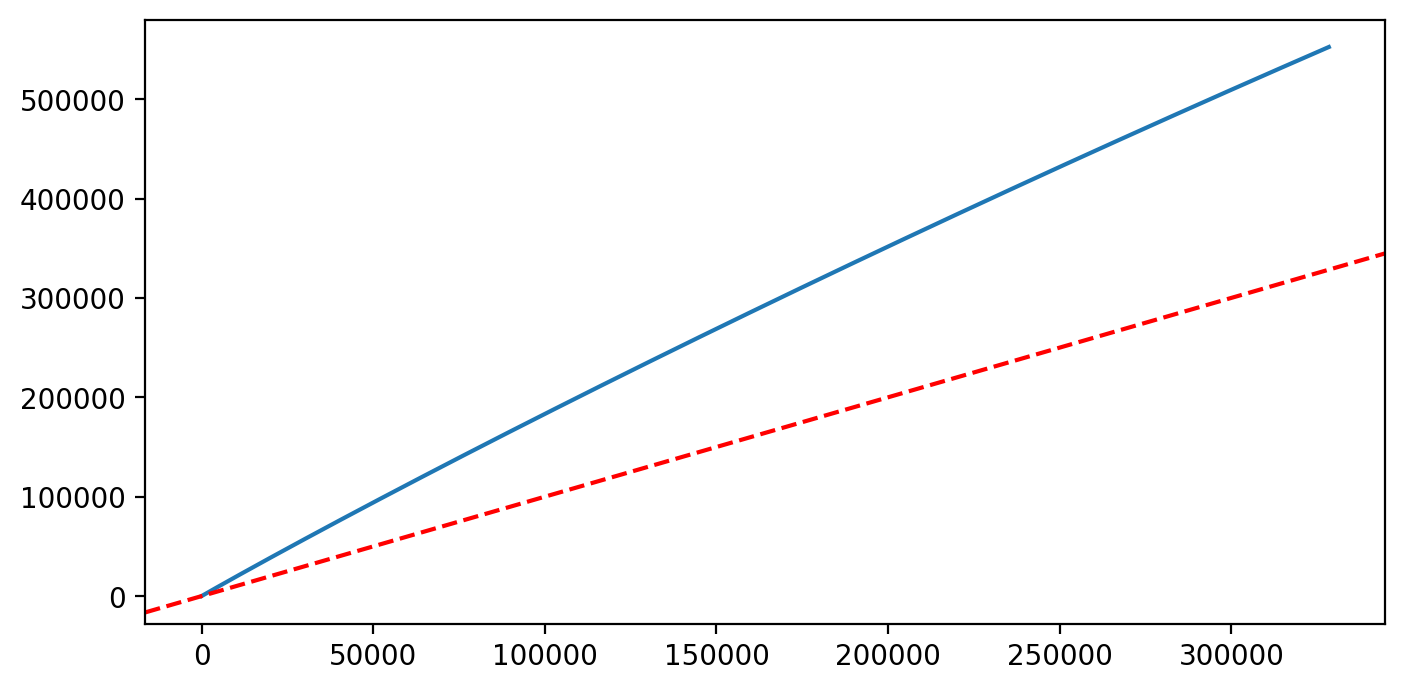

In [1066]:
plt.plot(Q2_sum_integral(Z, R, use_sum=True), Q2_sum_integral2(Z, R))
plt.axline((0, 0), slope=1, c='r', linestyle='dashed')

In [1060]:
Q2_sum_integral2(Z, R)[1], Q2_sum_integral(Z, R)[0]

/tmp/ipykernel_77201/3801913163.py:12: RuntimeWarning: invalid value encountered in multiply
  integrand = 1/(Power(E,2*k*T)*k) - 2/(Power(E,k*T)*k) + (2*Power(E,(-k - L)*T))/(k + L) - 1/(Power(E,2*(k + L)*T)*(k + L)) + L/(Power(k,2) + k*L) + 2*T*Gamma(0,k*T) - 2*T*Gamma(0,2*k*T) - 2*T*Gamma(0,(k + L)*T) + 2*T*Gamma(0,2*(k + L)*T)


(1.9970027202447227, 1.0)

In [1131]:
import warnings
@np.vectorize
def bgs_segment_sc162(mu, sh, L, rbp, N, asymptotic=True):
    """
    Using a non-linear solver to solve the pair of S&C '16 equations and
    report the results. return_both (outdated name) returns all the components
    for pre-calculating these for segments. full_output is for debugging the
    solver.
    WARNING: to minimize errors, these equations are taken directly from
    S&C '16, which is a *haploid* model. Hence, the population size
    argument is called haploid_N -- to modify this for diploids, haploid_N = 2N.
    """
    U = L*mu
    Vm = U*sh**2 
    #start_T =  (np.exp(4*sh*N) - 1)/(4*U*sh*N)
    start_T =  (np.exp(4*sh*N) - 1)/(2*U*sh*N)
    def func(x):
        T, Ne = x
        #V = U*sh - sh/(T)
        V = (U*sh - 2*sh/T)        
        VmV = Vm/V 
        Z = 1 - VmV
        # this is S&C's equation for a haploid model — the V half that for the diplod model, hence the 0.5
        Q2 = 0.5/(VmV * (VmV + L*rbp/2)) 
        #Q2 = 1/(2*(1-Z)*(2-(2-L*rbp)*Z))
        Q2 = -1/((-1 + Z)*(2 + (-2 + L*rbp)*Z))
        new_T = (np.exp(4*sh*Ne) - 1)/(2*U*sh*Ne)  # NOTE: this must depend on Ne, not N!
        #new_T = (np.exp(2*sh*Ne) - 1)/(2*U*sh*Ne)  # NOTE: this must depend on Ne, not N!
        return [np.log(new_T) - np.log(T),
                 np.log(N * np.exp(-V * Q2)) - np.log(Ne)] ## Factor of 2 here
    out = fsolve(func, [start_T, N], full_output=True)
    Ne = out[0][1]
    B = Ne/N
    T =  out[0][0]
    if out[2] != 1:
        #warnings.warn(f"no solution found!? mu={mu}, sh={sh}, L={L}, rbp={rbp}; T={T}, Ne={Ne}")
        V = U*sh
        VmV = Vm/V 
        Z = 1 - VmV
        Q2 = -1/((-1 + Z)*(2 + (-2 + L*rbp)*Z)) 
        return np.exp(-V * Q2)
    V = U*sh - sh/T
    VmV = Vm/V 
    Z = 1 - VmV
    Q2_asymp = -1/((-1 + Z)*(2 + (-2 + L*rbp)*Z))
    if asymptotic:
        return B
    else:
        Q2 = Q2_sum_integral2(Z, L*rbp, 20*N)
        Q2[~np.isfinite(Q2)] = 1
        Ne_t = N*np.exp(-V/2 * Q2)
        #print(Ne_t[-1], N*np.exp(-V/2 * Q2_asymp))
        return (1+np.sum([np.prod(1 - 1/(2*Ne_t[:i])) for i in np.arange(1, len(Ne_t))]))/(2*N)
        #return np.sum((1 - 1/(2*Ne_t)) * 1/(2*Ne_t) * np.arange(len(Ne_t))[::-1])
        #return np.prod(Ne_t)/(2*N)

In [ ]:
x = np.logspace(-5, -1, 100)
x2 = np.logspace(-5, -1, 30)

fig, ax = plt.subplots()

L = 100000
mus = dg['mu'].unique()
for mu in mus:
    dgs = dg.loc[dg['mu'] == mu]
    
    U = 2*mu*L
    sh = dgs['sh'].values
    
    rate = U/sh
    col = next(ax._get_lines.prop_cycler)['color']
    ax.scatter(rate, dgs['B_middle'],  c=col, alpha=0.4)
    ax.scatter(rate, dgs['B'],  alpha=0.4, linestyle='dashed', c=col)
    #lines = plt.plot(rate, dgs['B'], label=mu, alpha=0.4)
    
    new_theory = np.array(bgs_segment_sc162(mu, x, L, rbp, 1000))
    #plt.plot(U/x, new_theory, label=mu)
    ax.plot(U/x, new_theory, label=mu, c=col)
    #Bs = np.array(bgs_segment_sc162(mu, x2, L, rbp, 1000, asymptotic=False))
    #ax.plot(U/x2, Bs, label=mu, c=col, linestyle='dashed')
    
mu = 1e-10
bgs_theory = bgs_rec(mu, x, L, rbp)
ax.plot(mu*L/x, bgs_theory, c='0.22')

ax.legend()
ax.semilogx()
ax.set_ylabel("B")
ax.set_xlabel("U/s")
ax.set_ylim(0.40, 1.01)
ax.set_xlim(1e-3, 120)

/tmp/ipykernel_77201/2211948160.py:29: RuntimeWarning: invalid value encountered in log
  return [np.log(new_T) - np.log(T),


(0.001, 120)

In [1094]:
Bs

array([1.07664777e+05, 1.10264391e+05, 1.13604909e+05, 1.17800293e+05,
       1.22926189e+05, 1.29003721e+05, 1.36007937e+05, 1.43902804e+05,
       1.52666994e+05, 1.62251968e+05, 1.72454379e+05, 1.82768894e+05,
       1.92317068e+05, 1.99877544e+05, 2.03952662e+05, 5.49767830e-01,
       6.22472599e-01, 6.91527344e-01, 7.53767385e-01, 8.07360736e-01,
       8.51778241e-01, 8.87469361e-01, 9.15457099e-01, 9.36994011e-01,
       9.53330702e-01, 9.65589674e-01, 9.74714946e-01, 9.81467148e-01,
       9.86441465e-01, 9.90094187e-01])

In [866]:
plt.plot(mu*L/x2, bgs_segment_sc162(mu, x2, L, rbp, 1000, asymptotic=False))
plt.plot(mu*L/x2, bgs_segment_sc162(mu, x2, L, rbp, 1000, asymptotic=True))
plt.semilogx()

KeyboardInterrupt: 

[]

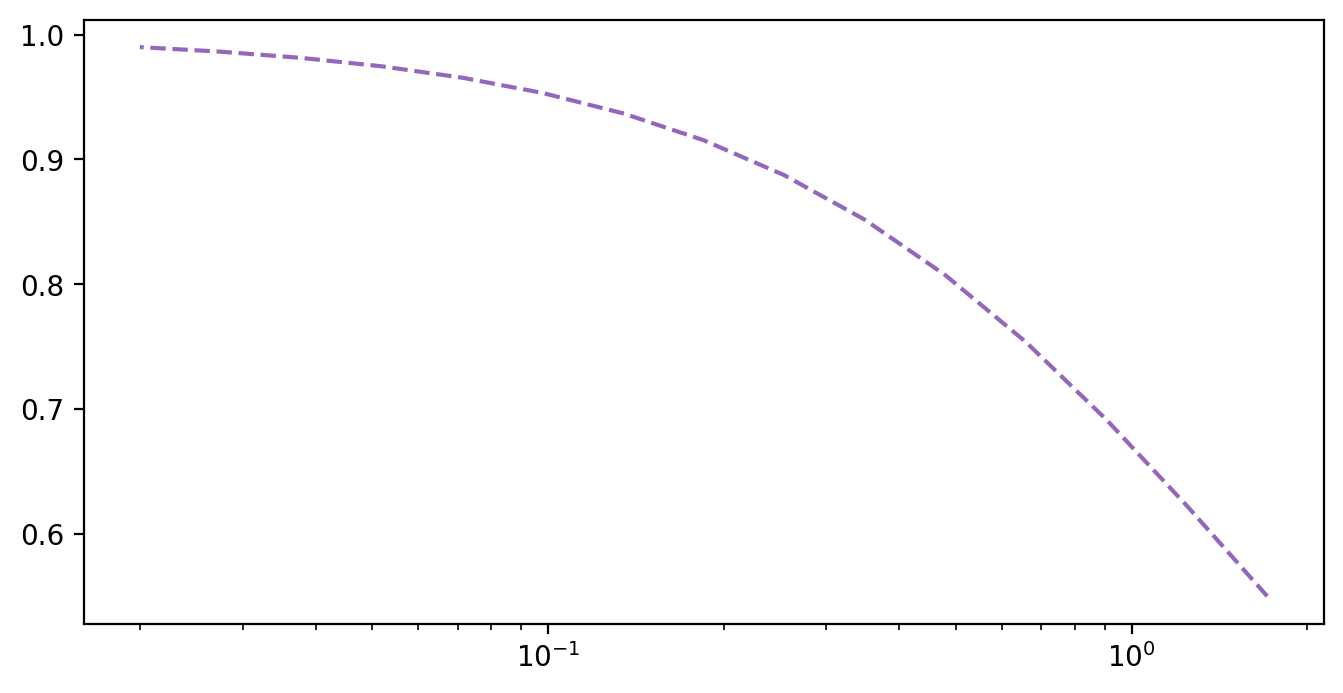

In [694]:
plt.plot(U/x2, Bs, label=mu, c=col, linestyle='dashed')
plt.semilogx()

/tmp/ipykernel_77201/3578244808.py:30: RuntimeWarning: invalid value encountered in log
  return [np.log(new_T) - np.log(T),
/tmp/ipykernel_77201/3578244808.py:36: UserWarning: no solution found!? mu=3.16e-09, sh=0.0031992671377973846, L=100000, rbp=1e-08; T=89309462.33462623, Ne=1000.0
  warnings.warn(f"no solution found!? mu={mu}, sh={sh}, L={L}, rbp={rbp}; T={T}, Ne={Ne}")
/tmp/ipykernel_77201/3578244808.py:36: UserWarning: no solution found!? mu=3.16e-09, sh=0.0035111917342151347, L=100000, rbp=1e-08; T=283375836.7882255, Ne=1000.0
  warnings.warn(f"no solution found!? mu={mu}, sh={sh}, L={L}, rbp={rbp}; T={T}, Ne={Ne}")
/tmp/ipykernel_77201/3578244808.py:36: UserWarning: no solution found!? mu=3.16e-09, sh=0.0038535285937105314, L=100000, rbp=1e-08; T=1015451227.2502878, Ne=1000.0
  warnings.warn(f"no solution found!? mu={mu}, sh={sh}, L={L}, rbp={rbp}; T={T}, Ne={Ne}")
/tmp/ipykernel_77201/3578244808.py:36: UserWarning: no solution found!? mu=3.16e-09, sh=0.0042292428743894986, L

(0.6, 1.01)

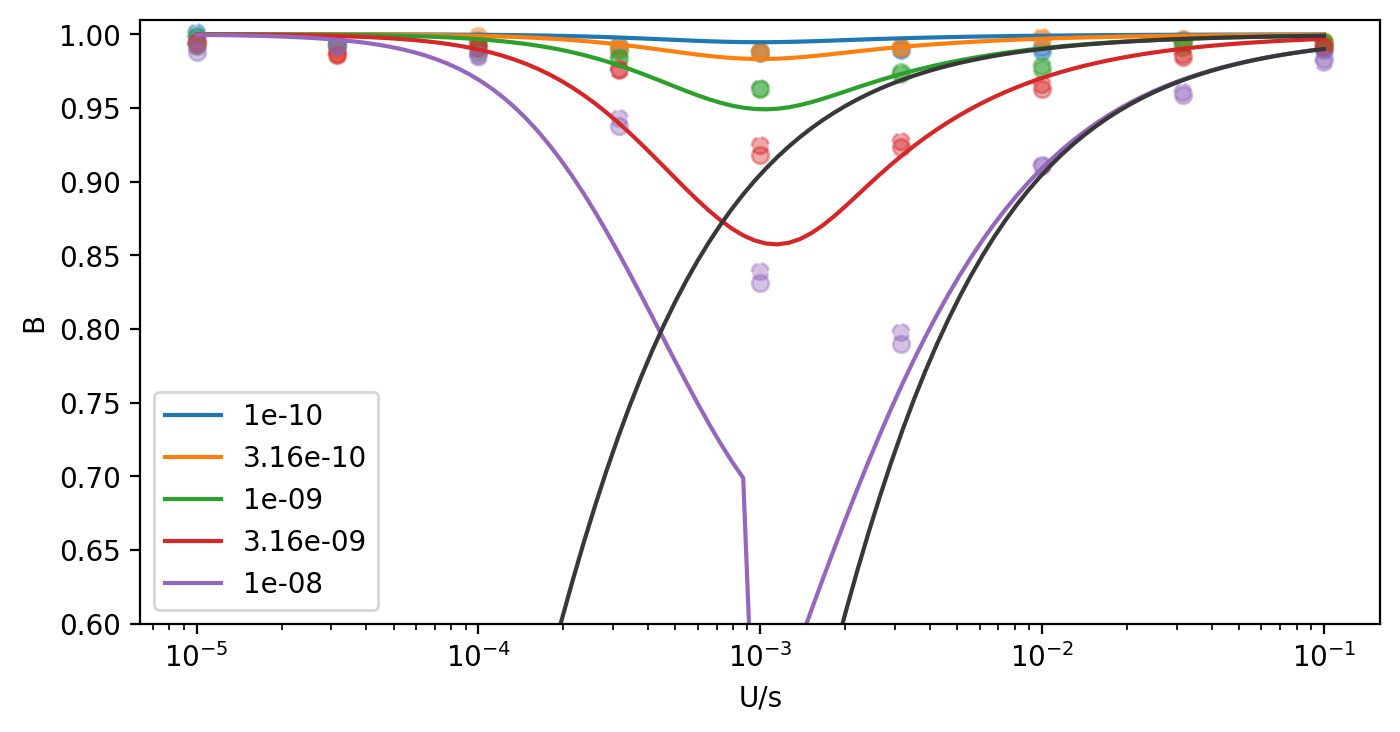

In [531]:
import warnings
@np.vectorize
def bgs_segment_sc162(mu, sh, L, rbp, haploid_N, full_output=False, return_both=False):
    """
    Using a non-linear solver to solve the pair of S&C '16 equations and
    report the results. return_both (outdated name) returns all the components
    for pre-calculating these for segments. full_output is for debugging the
    solver.
    WARNING: to minimize errors, these equations are taken directly from
    S&C '16, which is a *haploid* model. Hence, the population size
    argument is called haploid_N -- to modify this for diploids, haploid_N = 2N.
    """
    N = haploid_N
    U = 2*L*mu
    Vm = U*sh**2 
    #start_T =  (np.exp(4*sh*N) - 1)/(4*U*sh*N)
    start_T =  (np.exp(4*sh*N) - 1)/(2*U*sh*N)
    def func(x):
        T, Ne = x
        #V = U*sh - sh/(T)
        V = (U*sh - 2*sh/T)        
        VmV = Vm/V 
        Z = 1 - VmV
        # this is S&C's equation for a haploid model — the V half that for the diplod model, hence the 0.5
        Q2 = 0.5/(VmV * (VmV + L*rbp/2)) 
        #Q2 = 1/(2*(1-Z)*(2-(2-L*rbp)*Z))
        Q2 = -1/((-1 + Z)*(2 + (-2 + L*rbp)*Z))
        new_T = (np.exp(4*sh*Ne) - 1)/(2*U*sh*Ne)  # NOTE: this must depend on Ne, not N!
        #new_T = (np.exp(2*sh*Ne) - 1)/(2*U*sh*Ne)  # NOTE: this must depend on Ne, not N!
        return [np.log(new_T) - np.log(T),
                 np.log(N * np.exp(-V * Q2)) - np.log(Ne)] ## Factor of 2 here
    out = fsolve(func, [start_T, N], full_output=True)
    Ne = out[0][1]
    T =  out[0][0]
    if out[2] != 1:
        warnings.warn(f"no solution found!? mu={mu}, sh={sh}, L={L}, rbp={rbp}; T={T}, Ne={Ne}")
        V = U*sh
        VmV = Vm/V 
        Z = 1 - VmV
        Q2 = -1/((-1 + Z)*(2 + (-2 + L*rbp)*Z))
        return N * np.exp(-V * Q2)
    V = U*sh - sh/T
    VmV = Vm/V 
    Z = 1 - VmV
    Q2 = -1/((-1 + Z)*(2 + (-2 + L*rbp)*Z))
    if full_output:
        return out

        return np.nan
    if return_both:
        return float(T), float(Ne), float(Q2), float(V), float(Vm), float(U)
    return float(Ne)

x = np.logspace(-5, -1, 100)

fig, ax = plt.subplots()

L = 100000
mus = dg['mu'].unique()
for mu in mus:
    dgs = dg.loc[dg['mu'] == mu]
    
    U = 2*mu*L
    sh = dgs['sh'].values
    
    rate = sh
    col = next(ax._get_lines.prop_cycler)['color']
    ax.scatter(rate, dgs['B_middle'],  c=col, alpha=0.4)
    ax.scatter(rate, dgs['B'],  alpha=0.4, linestyle='dashed', c=col)
    #lines = plt.plot(rate, dgs['B'], label=mu, alpha=0.4)
    
    new_theory = np.array(bgs_segment_sc162(mu, x, L, rbp, 1000))/1000
    #plt.plot(U/x, new_theory, label=mu)
    ax.plot(x, new_theory, label=mu, c=col)
    
mu = 1e-8
bgs_theory = bgs_rec(mu, x, L, rbp)
ax.plot(x, bgs_theory, c='0.22')

mu = 1e-9
bgs_theory = bgs_rec(mu, x, L, rbp)
ax.plot(x, bgs_theory, c='0.22')

ax.legend()
ax.semilogx()
ax.set_ylabel("B")
ax.set_xlabel("U/s")
ax.set_ylim(0.60, 1.01)
#ax.set_xlim(1e-3, 120)

/tmp/ipykernel_77201/2051698493.py:27: RuntimeWarning: invalid value encountered in log
  return [np.log(new_T) - np.log(T),
/tmp/ipykernel_77201/2051698493.py:39: UserWarning: no solution found!
  warnings.warn("no solution found!")
/tmp/ipykernel_77201/2051698493.py:16: RuntimeWarning: overflow encountered in exp
  start_T =  (np.exp(2*sh*N) - 1)/(2*U*sh*N)
/tmp/ipykernel_77201/2051698493.py:26: RuntimeWarning: overflow encountered in exp
  new_T = (np.exp(2*sh*Ne) - 1)/(2*U*sh*Ne)  # NOTE: this must depend on Ne, not N!
/tmp/ipykernel_77201/2051698493.py:27: RuntimeWarning: invalid value encountered in double_scalars
  return [np.log(new_T) - np.log(T),


[]

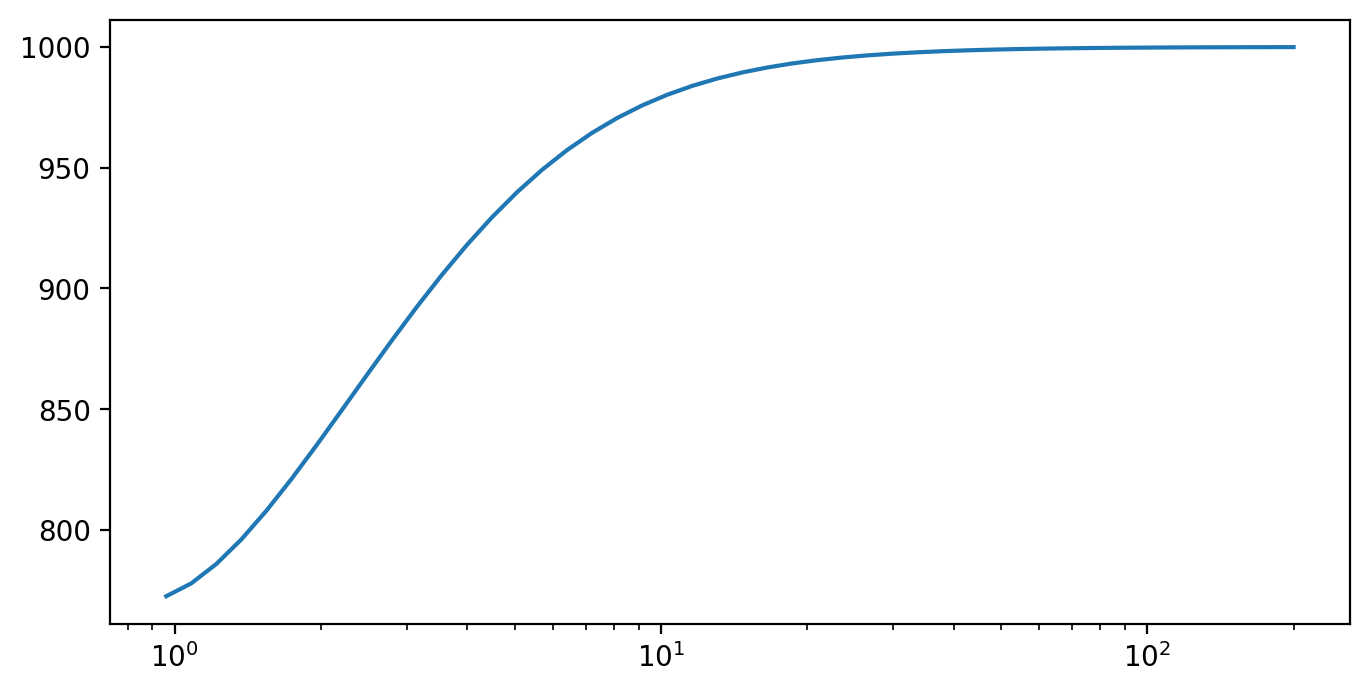

In [449]:
plt.plot(U/x, bgs_segment_sc162(mu, x, L, rbp, 1000))
plt.semilogx()

In [444]:
mu

1e-08

[]

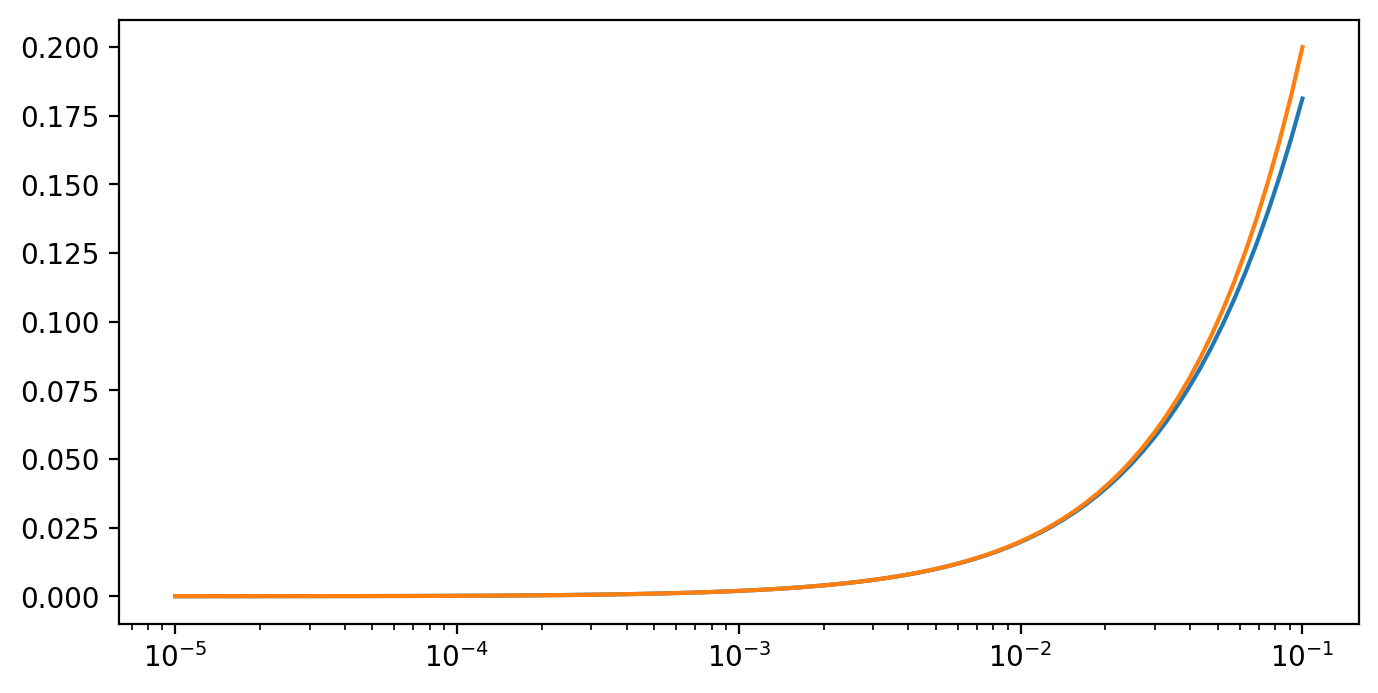

In [102]:
def pfix(sh, Ne, N=None):
    N = Ne if N is None else N
    return (1-np.exp((2*Ne*sh)/N))/(1-np.exp(4*Ne*sh))

def pfix2(sh, Ne, N=None):
    N = Ne if N is None else N
    return 2*sh/(np.expm1(4*Ne*sh))

#plt.plot(Ne, pfix(sh, Ne))

sh = -np.logspace(-5, -1, 100)
plt.plot(-sh, pfix(sh, 10000))
plt.plot(-sh, pfix2(sh, 10000))

plt.semilogx()

/home/vsb/projects/bprime/bgspy/theory.py:45: RuntimeWarning: overflow encountered in expm1
  return (np.expm1(2*Ne*sh)) / (2*U*sh*Ne)
/home/vsb/projects/bprime/bgspy/theory.py:61: RuntimeWarning: invalid value encountered in double_scalars
  return [np.log(Tfix(Ne, sh, U)) - np.log(T),
/home/vsb/projects/bprime/bgspy/theory.py:45: RuntimeWarning: overflow encountered in expm1
  return (np.expm1(2*Ne*sh)) / (2*U*sh*Ne)
/home/vsb/projects/bprime/bgspy/theory.py:61: RuntimeWarning: invalid value encountered in double_scalars
  return [np.log(Tfix(Ne, sh, U)) - np.log(T),
/home/vsb/projects/bprime/bgspy/theory.py:45: RuntimeWarning: overflow encountered in expm1
  return (np.expm1(2*Ne*sh)) / (2*U*sh*Ne)
/home/vsb/projects/bprime/bgspy/theory.py:61: RuntimeWarning: invalid value encountered in double_scalars
  return [np.log(Tfix(Ne, sh, U)) - np.log(T),
/home/vsb/projects/bprime/bgspy/theory.py:45: RuntimeWarning: overflow encountered in expm1
  return (np.expm1(2*Ne*sh)) / (2*U*sh*Ne)
/

(0.9, 1.0)

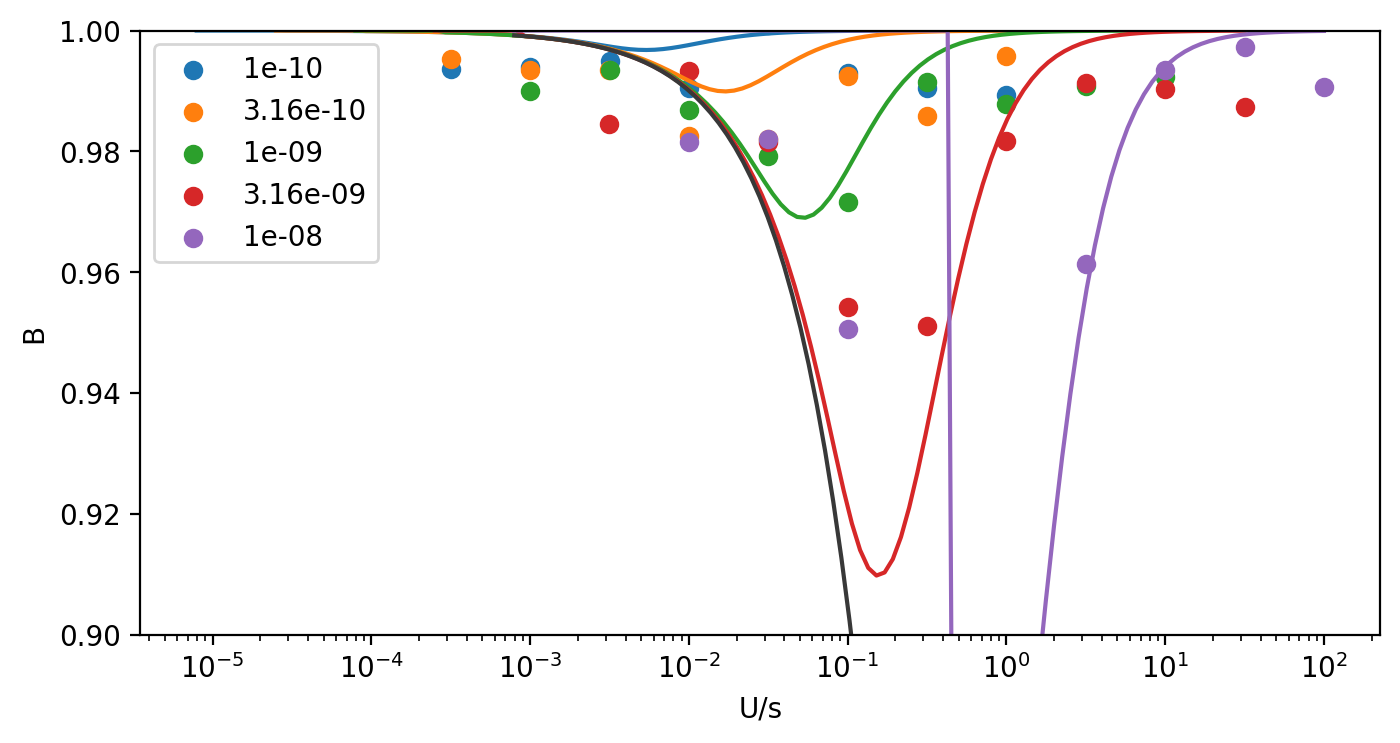

In [52]:
from bgspy.theory import bgs_rec, bgs_rec_sc16, bgs_segment_full

L = 100_000
x = np.logspace(-5, 0.1, 100)


mus = dg['mu'].unique()
for mu in mus:
    dgs = dg.loc[dg['mu'] == mu]
    
    U = mu * L
    sh = dgs['sh'].values
    
    rate = U/sh
    plt.scatter(rate, dgs['B'], label=mu)
    
    new_theory = np.array(bgs_segment_full(mu, x, L, rbp, 1000))
    plt.plot(U/x, new_theory)
    
mu = 1e-8
bgs_theory = bgs_rec(mu, x, L, rbp)
plt.plot(mu*L/x, bgs_theory, c='0.22')

plt.legend()
plt.semilogx()
plt.ylabel("B")
plt.xlabel("U/s")
plt.ylim(0.90, 1)

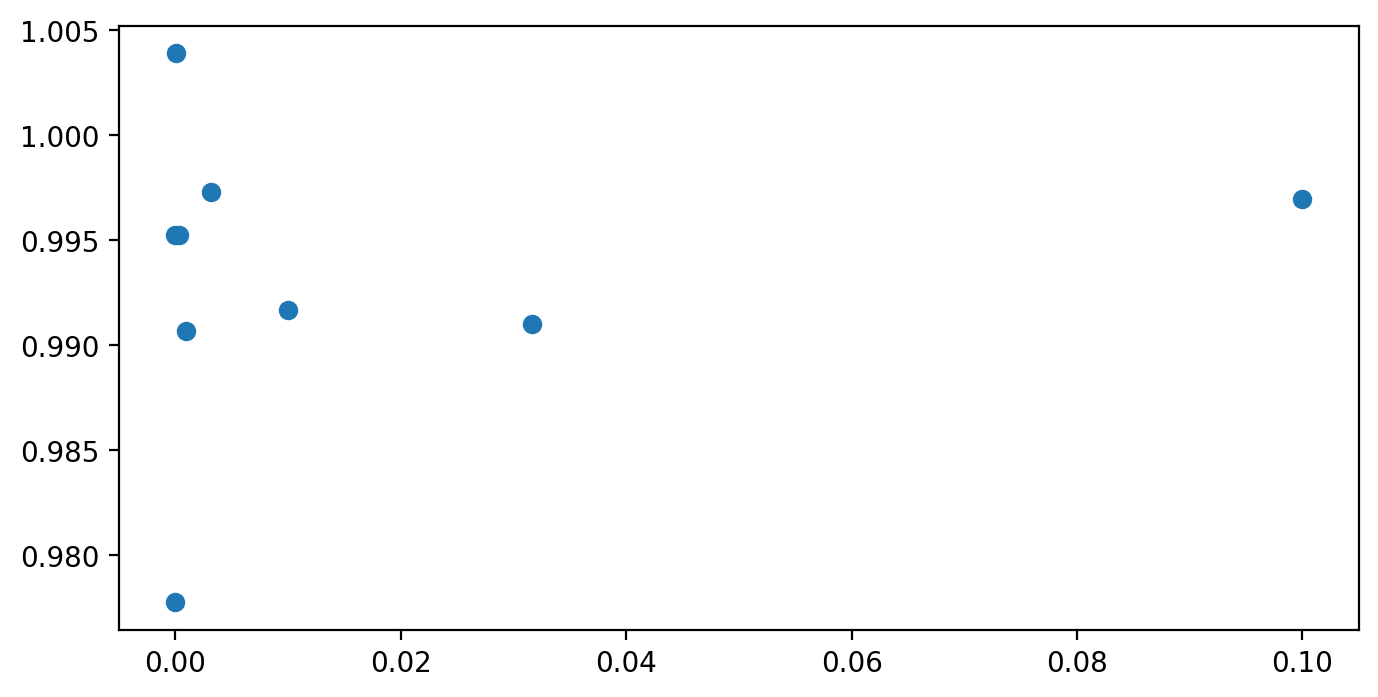

In [11]:
plt.scatter(rate, dgs['B'], label=mu)


In [174]:
from bgspy.theory import bgs_rec, bgs_rec_sc16, bgs_segment_full

bgs_segment_full(1e-8, 0.2, 1000, 1e-8, 1000, True)

(array([6.39792270e+175, 9.99950002e+002]),
 array({'nfev': 17, 'fjac': array([[-1.00000000e+00, -5.48621541e-08],
        [ 5.48621541e-08, -1.00000000e+00]]), 'r': array([ 1.54554690e-176, -3.95509507e-001,  1.00004377e-003]), 'qtf': array([ 2.79720723e-07, -1.36981817e-12]), 'fvec': array([ 3.15873194e-09, -1.50990331e-14])},
       dtype=object),
 array(1),
 array('The solution converged.', dtype='<U23'))

In [12]:
dg['R'].values

array([7.31105595e-06, 1.89192378e-05, 6.05139289e-05, 1.99451950e-04,
       6.56652468e-04, 2.10514290e-03, 4.21124017e-06, 1.09287886e-05,
       4.28197735e-05, 1.30652636e-04, 4.49994704e-04, 1.59740555e-03,
       8.12743457e-07, 3.52187660e-06, 6.00141446e-06, 2.86439979e-05,
       1.44477250e-04, 7.71281085e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.23249919e-06, 7.87012265e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

110701.37908008491
V = 9.666320136120825e-11, T = 110700.68234869506, Vm = 1.0000000000000002e-13, Ne = 999.9390907810624
110701.37908008491
V = 9.666320136120825e-11, T = 110700.68234869506, Vm = 1.0000000000000002e-13, Ne = 999.9390907810624
35032.08198736865
V = 3.054169326832756e-10, T = 35031.385544509256, Vm = 3.16e-13, Ne = 999.8076048609965
11070.137908008492
V = 9.661212736528309e-10, T = 11069.442376766863, Vm = 1e-12, Ne = 999.3919344524278
3503.208198736865
V = 3.0490915853059727e-09, T = 3502.5155258644572, Vm = 3.16e-12, Ne = 998.0862401420372
1107.0137908008492
V = 9.611053946293866e-09, T = 1106.329970266312, Vm = 1.0000000000000001e-11, Ne = 994.0195484023184
350.32081987368645
V = 3.0010449315377924e-08, T = 349.6631249659748, Vm = 3.16e-11, Ne = 981.808747135913
139457.2085678423
V = 8.936807461772721e-10, T = 139433.13567450174, Vm = 9.9856e-13, Ne = 999.5054303032018
44132.02802779819
V = 2.8213723570667534e-09, T = 44108.03449436738, Vm = 3.1554496e-12, Ne = 998.4

/home/vsb/projects/bprime/bgspy/theory.py:82: RuntimeWarning: invalid value encountered in log
  return [np.log((np.exp(2*sh*Ne) - 1)/(2*U*sh*Ne)) - np.log(T),
/home/vsb/projects/bprime/bgspy/theory.py:107: UserWarning: no solution found!
  warnings.warn("no solution found!")


(1e-07, 0.1)

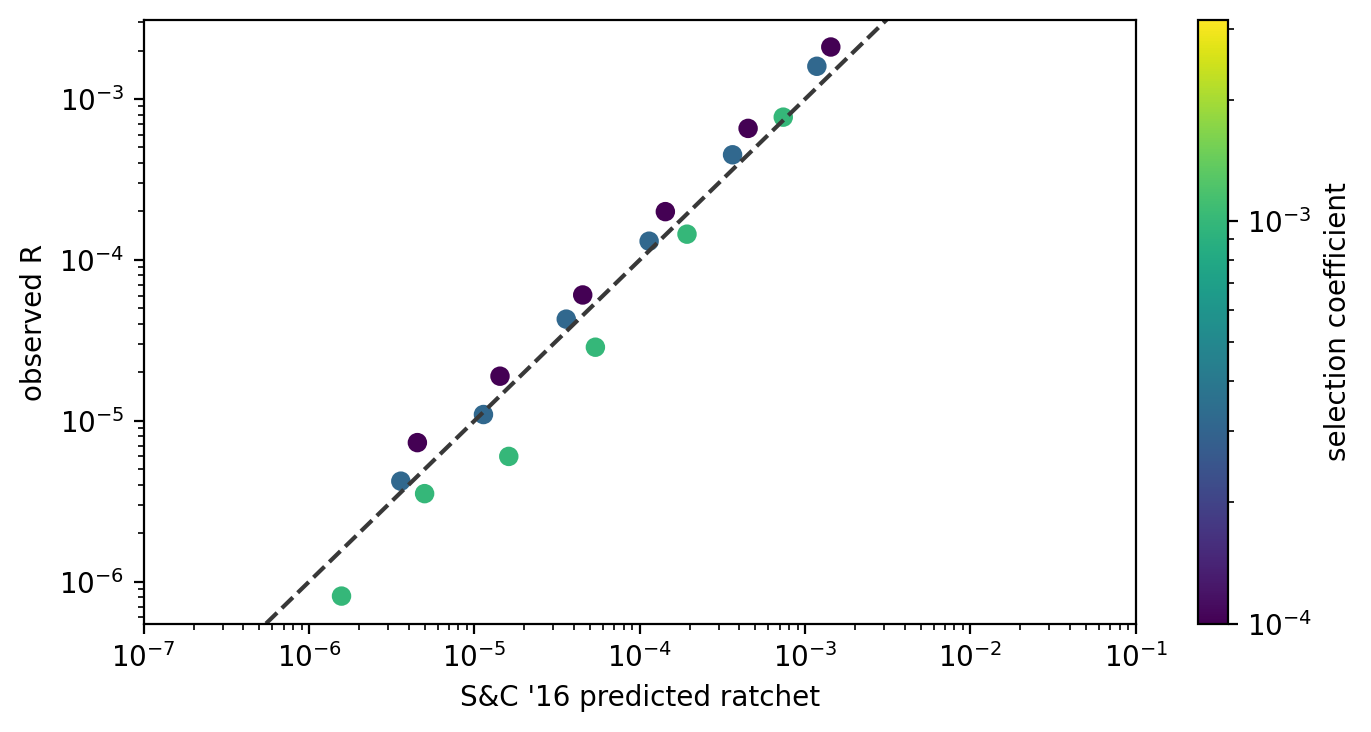

In [13]:
mu, sh = dg.mu, dg.sh
T, Ne, *_ = np.vectorize(bgs_segment_sc16)(mu, sh, L, rbp, N, return_both=True)

#plt.scatter(0.5/T, dg['R'], c=np.log10(dg['sh'])) #NOTE factor of two

lognorm = mpl.colors.LogNorm()

plt.scatter(0.5/T, dg['R'], c=dg['sh'], norm=lognorm) #NOTE factor of two
plt.axline((0, 0), slope=1, c='0.22', linestyle='dashed')
plt.loglog()
plt.xlabel("S&C '16 predicted ratchet")
plt.ylabel("observed R")
plt.colorbar(label="selection coefficient")


plt.xlim((1e-7, 1e-1))

Text(0, 0.5, 'Var(k)')

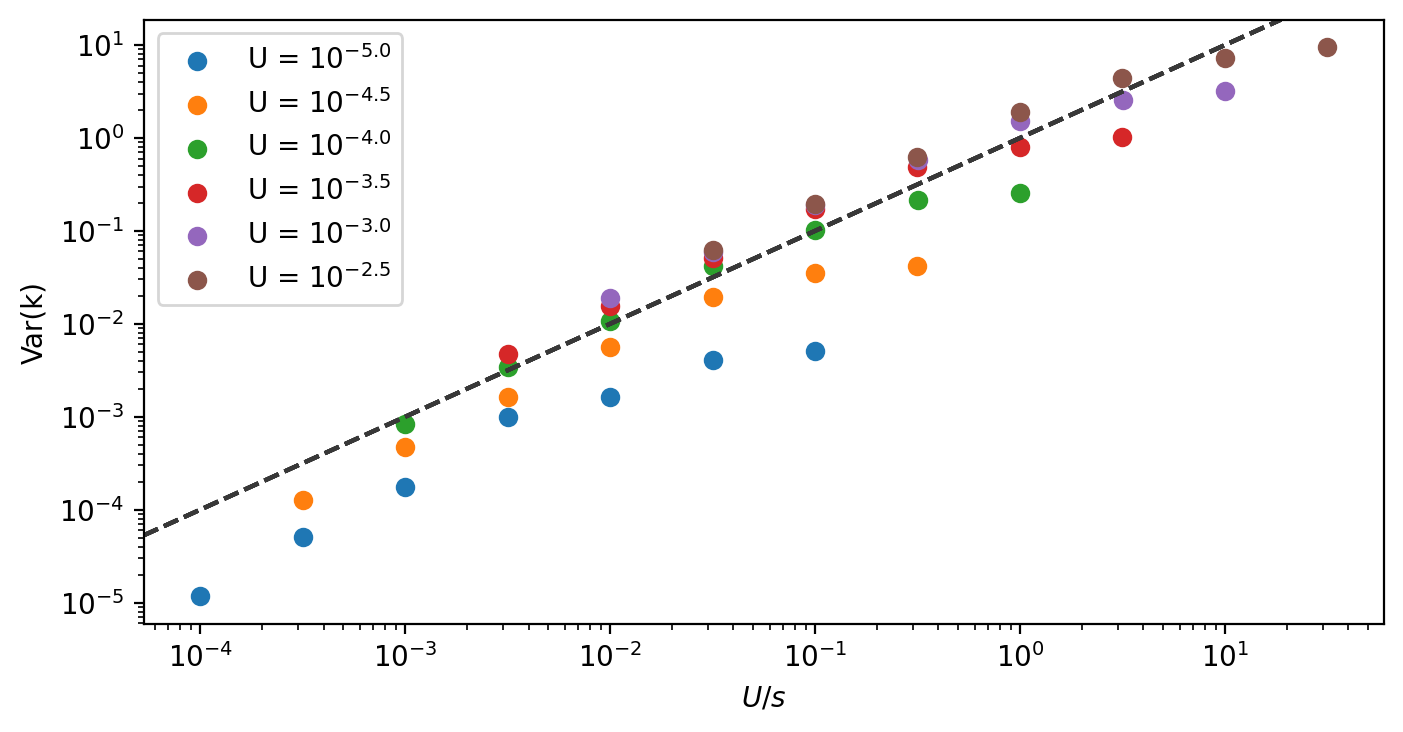

In [44]:


for u in dg['U'].unique():
    dgs = dg.loc[dg['U'] == u]
    sh = np.logspace(-5, -1, 100)
    plt.scatter(dgs['U']/dgs['sh'], dgs['k_sd']**2, label=f"U = $10^{{{np.round(np.log10(u), 2)}}}$")
    rate = dgs['U']/dgs['sh']
    plt.axline((0, 0), slope=1, c='0.22', linestyle='dashed')

plt.loglog()
plt.legend()
plt.xlabel("$U/s$")
plt.ylabel("Var(k)")

In [45]:
from scipy.optimize import fsolve, broyden1, broyden2, root
import warnings



@np.vectorize
def bgs_segment_sc16p(mu, sh, L, rbp, N, full_output=False, return_both=False):
    U = L*mu
    Vm = U*sh**2
    start_T = (np.exp(2*sh*N) - 1)/(2*U*sh*N)
    print(start_T)
    def func(x):
        T, Ne = x
        allow_ratchet = 1
        if T > 10000*N:
            allow_ratchet = 0
        V = U*sh - (sh/T)*allow_ratchet
        VmV = Vm/V
        #Q2 = 1/(VmV * (VmV + L*rbp/2))
        Q2 = 2*V**2 / (Vm*(L*rbp*(V-Vm) + 2*Vm))
        #if T <= 0:
        #    T = 1000*N
        #print(2*sh*Ne, Ne, T)
        return [np.log(((np.expm1(2*sh*Ne))/(2*U*sh*Ne)) / T),
                 np.log(N * np.exp(-V*Q2) / Ne)]
    out = fsolve(func, [start_T, N], full_output=True)
    #return out.x[1]
    Ne = out[0][1]
    T =  out[0][0]
    V = U*sh - sh/T
    print(f"V = {V}, T = {T}, Vm = {Vm}, Ne = {Ne}")
    VmV = Vm/V
    #Q2 = 1/(VmV * (VmV + L*rbp/2))
    Q2 = 2*V**2 / (Vm*(L*rbp*(V-Vm) + 2*Vm))
    if full_output:
        return out
    if out[2] != 1:
        warnings.warn("no solution found!")
        return np.nan
    if return_both:
        return float(T), float(Ne), float(Q2), float(V), float(Vm), float(U)
    return float(Ne)

bgs_segment_sc16p(3.16e-8, 1e-1, L, rbp, N, full_output=True),

1.1433502797667323e+87
V = 0.00031600000000000004, T = 1.1433502797667323e+87, Vm = 3.160000000000001e-05, Ne = 1000.0
1.1433502797667323e+87
V = 0.00031600000000000004, T = 1.1433502797667323e+87, Vm = 3.160000000000001e-05, Ne = 1000.0


/tmp/ipykernel_41150/1711276099.py:24: RuntimeWarning: invalid value encountered in log
  return [np.log(((np.expm1(2*sh*Ne))/(2*U*sh*Ne)) / T),


((array([1.14335028e+87, 1.00000000e+03]),
  array({'nfev': 15, 'fjac': array([[-1.,  0.],
         [ 0., -1.]]), 'r': array([nan, nan, nan]), 'qtf': array([0.        , 0.03145844]), 'fvec': array([ 0.        , -0.03145844])},
        dtype=object),
  array(5),
  array('The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.',
        dtype='<U106')),)

In [40]:
np.vectorize(bgs_segment_sc16)(3.16e-8, 1e-2, L, rbp, N, full_output=True)

7676664468.509339
V = 3.159999869735091e-05, T = 7676664468.509339, Vm = 3.16e-07, Ne = 1000.0
7676664468.509339
V = 3.159999869735091e-05, T = 7676664468.509339, Vm = 3.16e-07, Ne = 1000.0


(array([7.67666447e+09, 1.00000000e+03]),
 array({'nfev': 15, 'fjac': array([[-1.00000000e+00, -5.96046448e-08],
        [ 5.96046448e-08, -1.00000000e+00]]), 'r': array([nan, nan, nan]), 'qtf': array([1.79467036e-08, 3.01095723e-01]), 'fvec': array([ 0.        , -0.30109572])},
       dtype=object),
 array(5),
 array('The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.',
       dtype='<U106'))

In [26]:
dg['theory_V'] = dg['U'] * dg['sh'] -  dg['sh'] *  dg['R']

In [36]:
sc16_V = bgs_segment_sc16(dg['mu'].values, dg['sh'].values, L, rbp, N, return_both=True)[3]

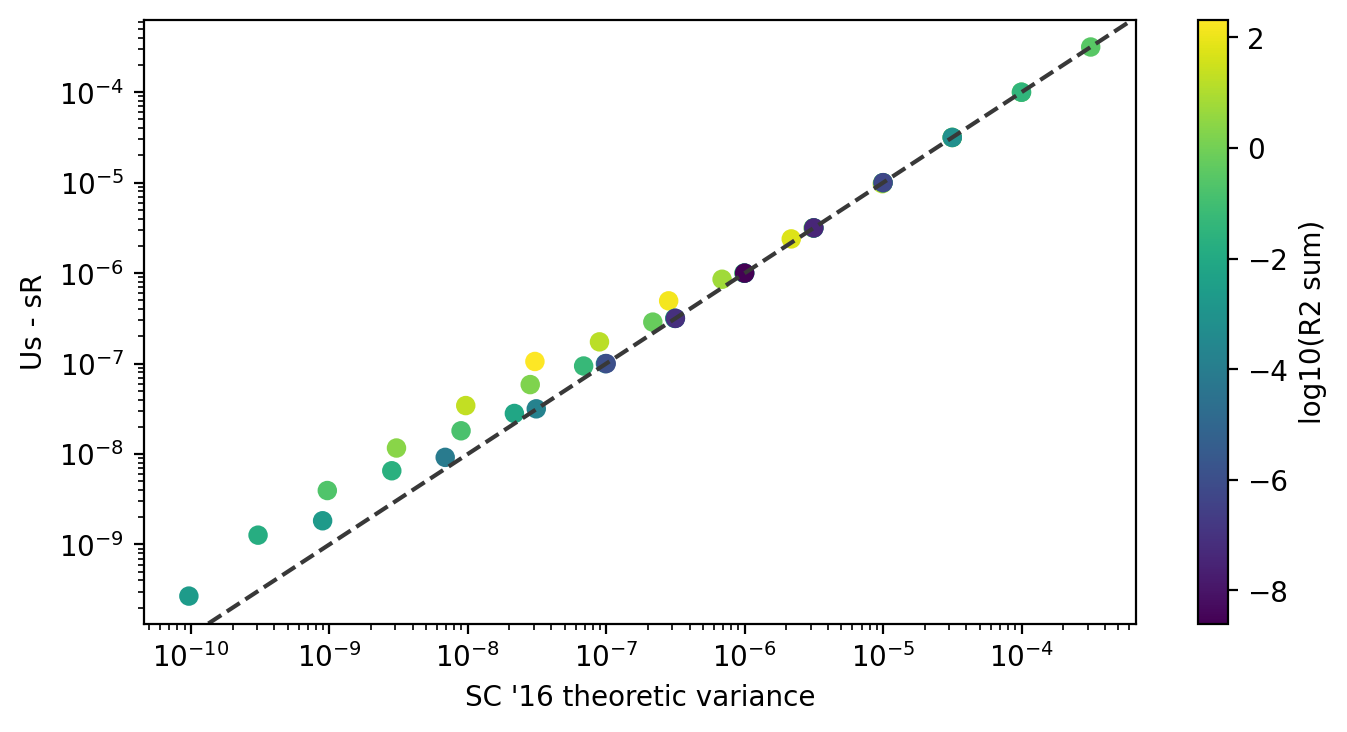

In [37]:
plt.scatter(sc16_V, dg['theory_V'], c=np.log10(dg['r2sum']))
plt.axline((0, 0), slope=1, linestyle='dashed', c='0.22')
plt.loglog()
plt.xlabel("SC '16 theoretic variance")
plt.ylabel('Us - sR') 
plt.colorbar(label="log10(R2 sum)")


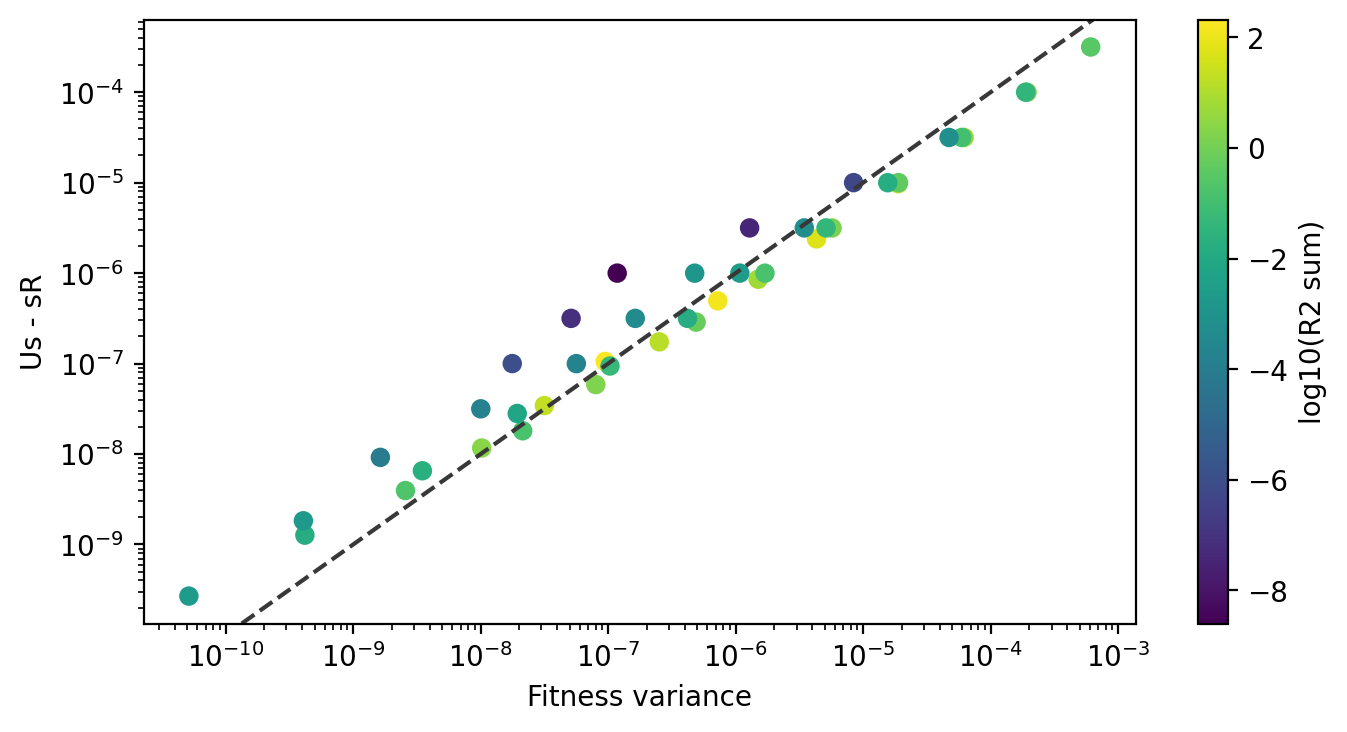

In [38]:
plt.scatter(dg['f_sd']**2, dg['theory_V'], c=np.log10(dg['r2sum']))
plt.axline((0, 0), slope=1, linestyle='dashed', c='0.22')
plt.loglog()
plt.xlabel("Fitness variance")
plt.ylabel('Us - sR')
plt.colorbar(label="log10(R2 sum)")


[]

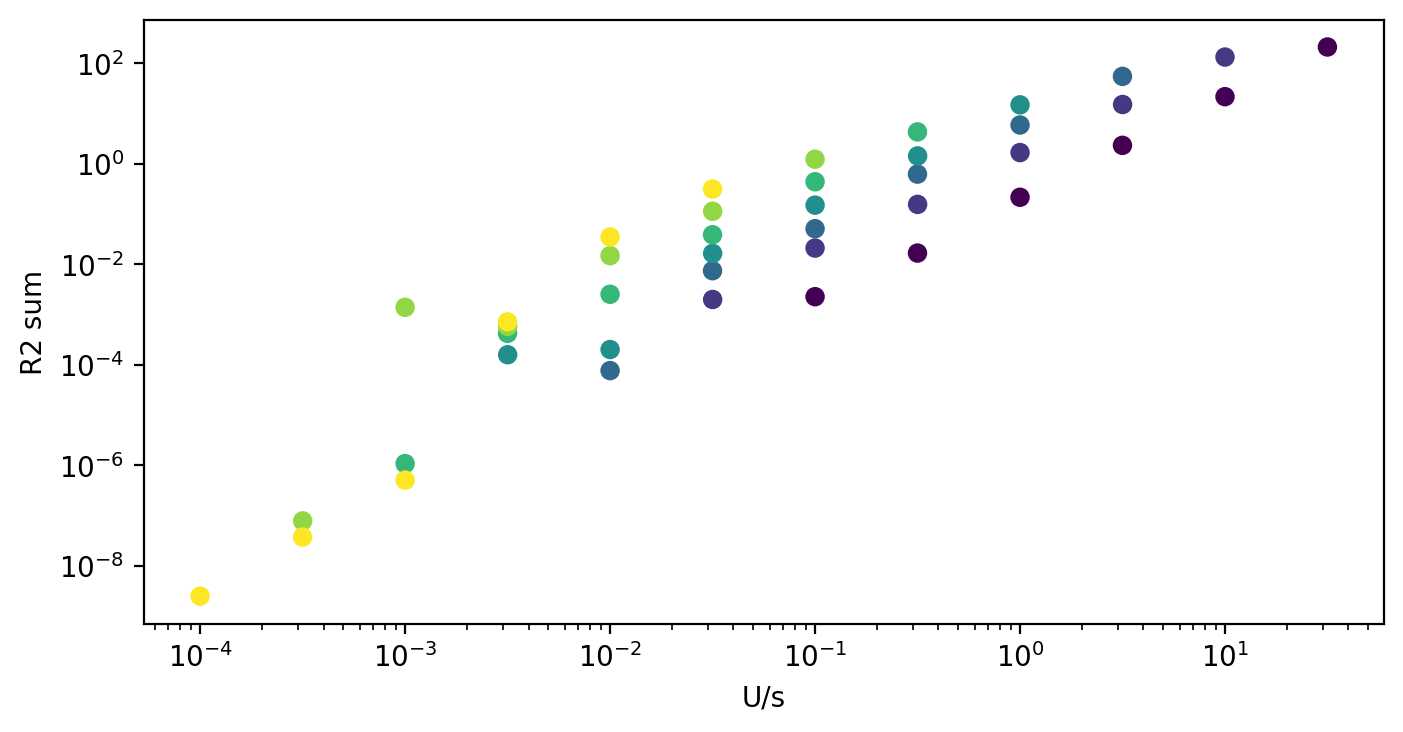

In [ ]:
plt.scatter(dg['U']/dg['sh'], np.abs(dg['r2sum']), c=np.log10(dg['sh']))
plt.xlabel("U/s")
plt.ylabel("R2 sum")
plt.loglog()

[]

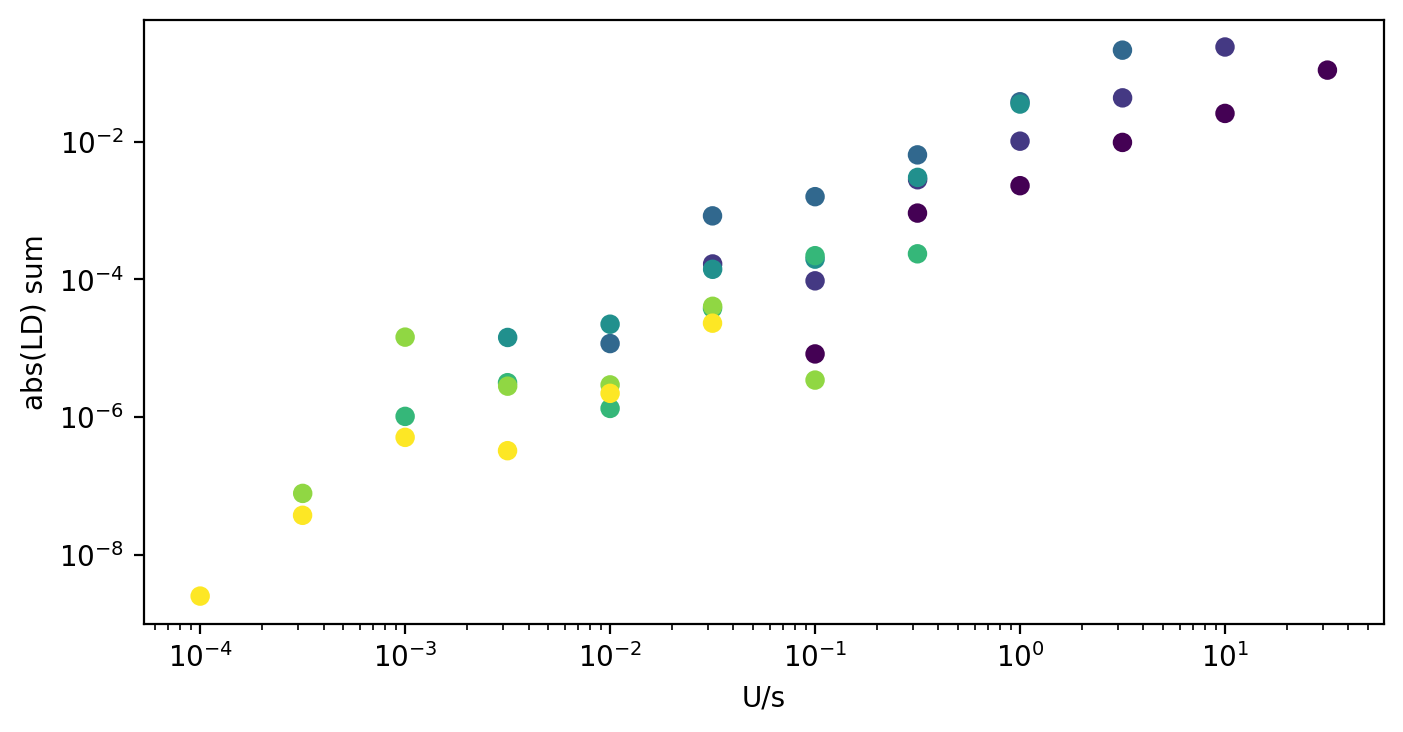

In [ ]:
plt.scatter(dg['U']/dg['sh'], np.abs(dg['ldsum']), c=np.log10(dg['sh']))
plt.xlabel("U/s")
plt.ylabel("abs(LD) sum")
plt.loglog()

[]

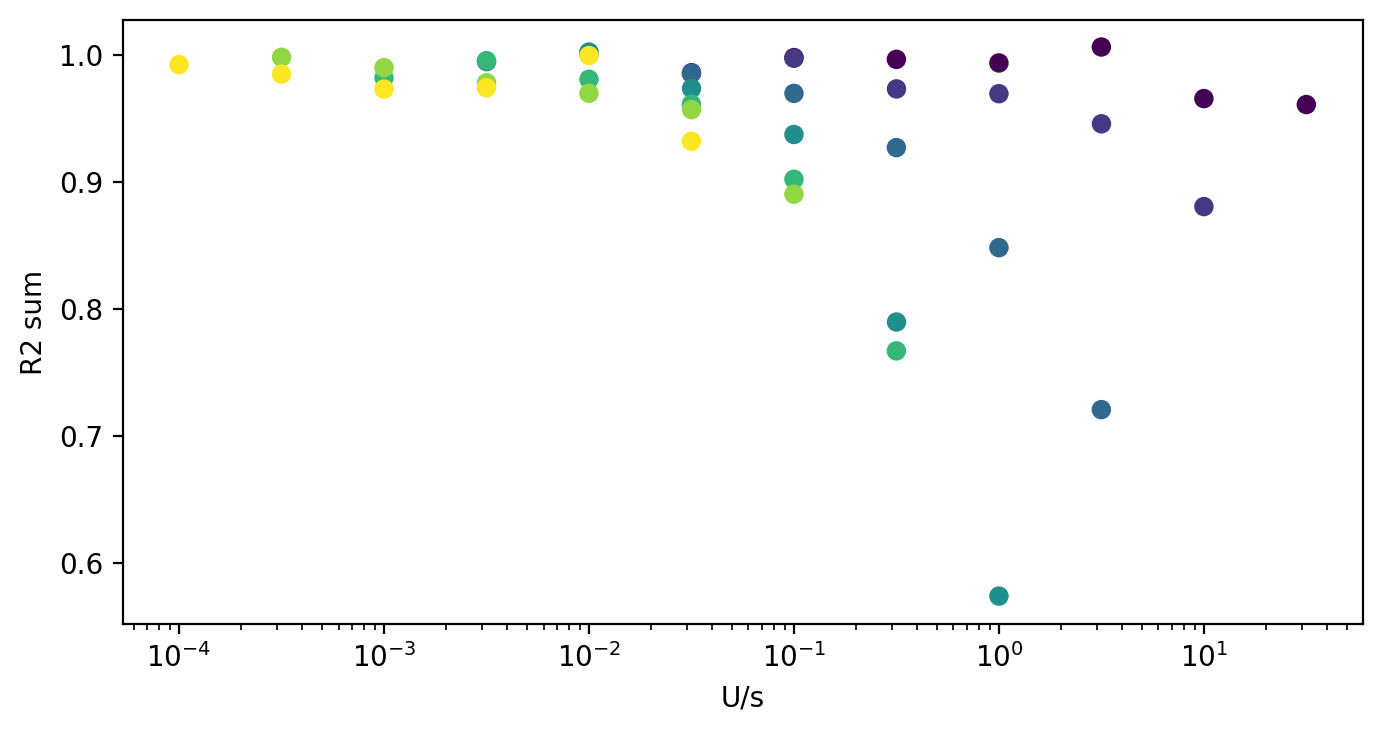

In [ ]:
plt.scatter(dg['U']/dg['sh'], dg['B'], c=np.log10(dg['sh']))
plt.xlabel("U/s")
plt.ylabel("R2 sum")
plt.semilogx()

Text(0.5, 0, 'U/s')

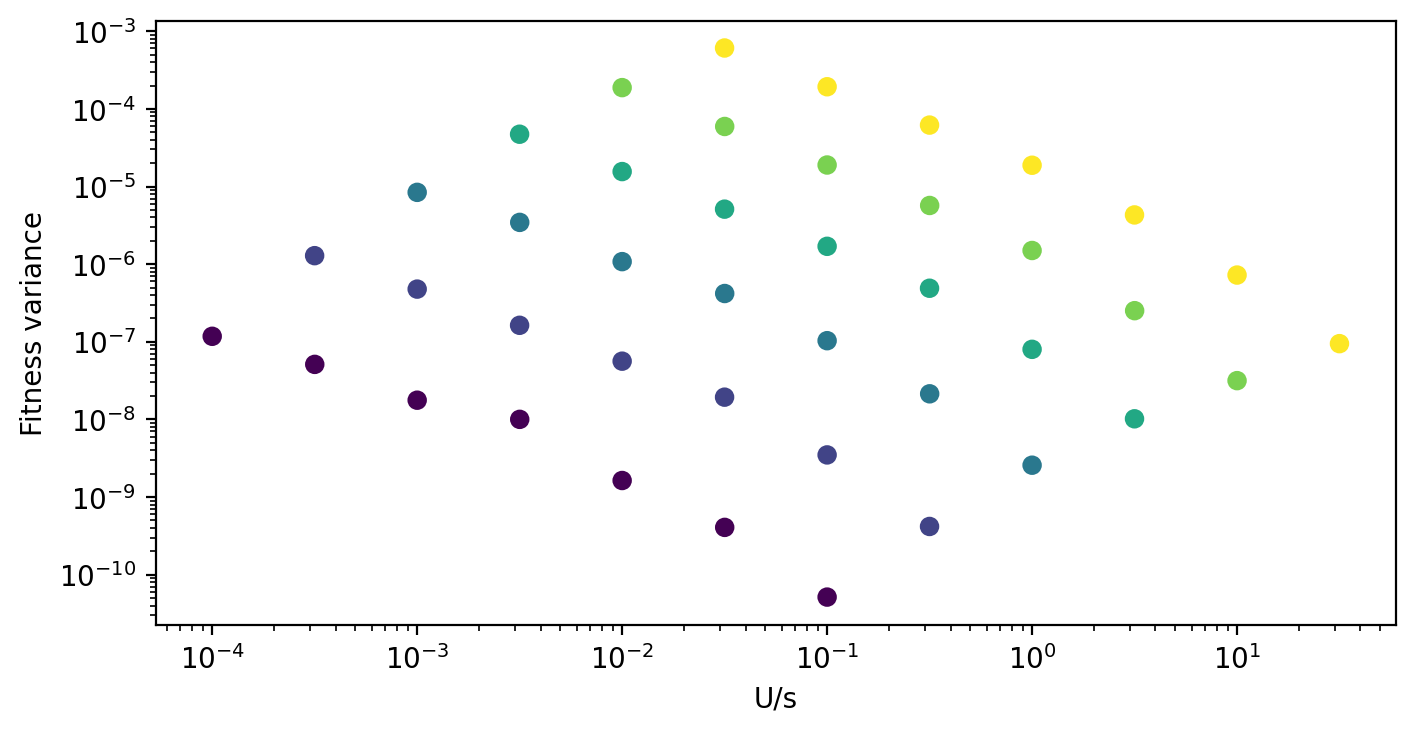

In [ ]:
plt.scatter(L*dg['mu']/dg['sh'], dg['f_sd']**2, c=np.log10(dg['mu']))
plt.loglog()
plt.ylabel("Fitness variance")
plt.xlabel('U/s')

In [56]:
mu, sh, L

(3.16e-08,
 array([1.00000000e-05, 1.09749877e-05, 1.20450354e-05, 1.32194115e-05,
        1.45082878e-05, 1.59228279e-05, 1.74752840e-05, 1.91791026e-05,
        2.10490414e-05, 2.31012970e-05, 2.53536449e-05, 2.78255940e-05,
        3.05385551e-05, 3.35160265e-05, 3.67837977e-05, 4.03701726e-05,
        4.43062146e-05, 4.86260158e-05, 5.33669923e-05, 5.85702082e-05,
        6.42807312e-05, 7.05480231e-05, 7.74263683e-05, 8.49753436e-05,
        9.32603347e-05, 1.02353102e-04, 1.12332403e-04, 1.23284674e-04,
        1.35304777e-04, 1.48496826e-04, 1.62975083e-04, 1.78864953e-04,
        1.96304065e-04, 2.15443469e-04, 2.36448941e-04, 2.59502421e-04,
        2.84803587e-04, 3.12571585e-04, 3.43046929e-04, 3.76493581e-04,
        4.13201240e-04, 4.53487851e-04, 4.97702356e-04, 5.46227722e-04,
        5.99484250e-04, 6.57933225e-04, 7.22080902e-04, 7.92482898e-04,
        8.69749003e-04, 9.54548457e-04, 1.04761575e-03, 1.14975700e-03,
        1.26185688e-03, 1.38488637e-03, 1.51991108e-0

In [58]:
bgs_segment_sc16(mu, sh, L, rbp, 2*N)

array([1999.99999995, 1999.99999994, 1999.99999993, 1999.99999991,
       1999.9999999 , 1999.99999987, 1999.99999985, 1999.99999982,
       1999.99999978, 1999.99999974, 1999.99999969, 1999.99999962,
       1999.99999955, 1999.99999946, 1999.99999935, 1999.99999922,
       1999.99999906, 1999.99999888, 1999.99999866, 1999.9999984 ,
       1999.99999808, 1999.99999771, 1999.99999727, 1999.99999675,
       1999.99999613, 1999.9999954 , 1999.99999453, 1999.99999352,
       1999.99999233, 1999.99999093, 1999.99998931, 1999.99998742,
       1999.99998523, 1999.99998271, 1999.99997982, 1999.99997653,
       1999.9999728 , 1999.99996861, 1999.99996395, 1999.99995879,
       1999.99995317, 1999.9999471 , 1999.99994063, 1999.99993386,
       1999.99992689, 1999.99991985, 1999.9999129 , 1999.99990621,
       1999.99989994, 1999.99989424, 1999.99988924, 1999.999885  ,
       1999.99988156, 1999.99987889, 1999.99987691, 1999.99987552,
       1999.99987459, 1999.999874  , 1999.99987365, 1999.99987

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.4, 1.05)

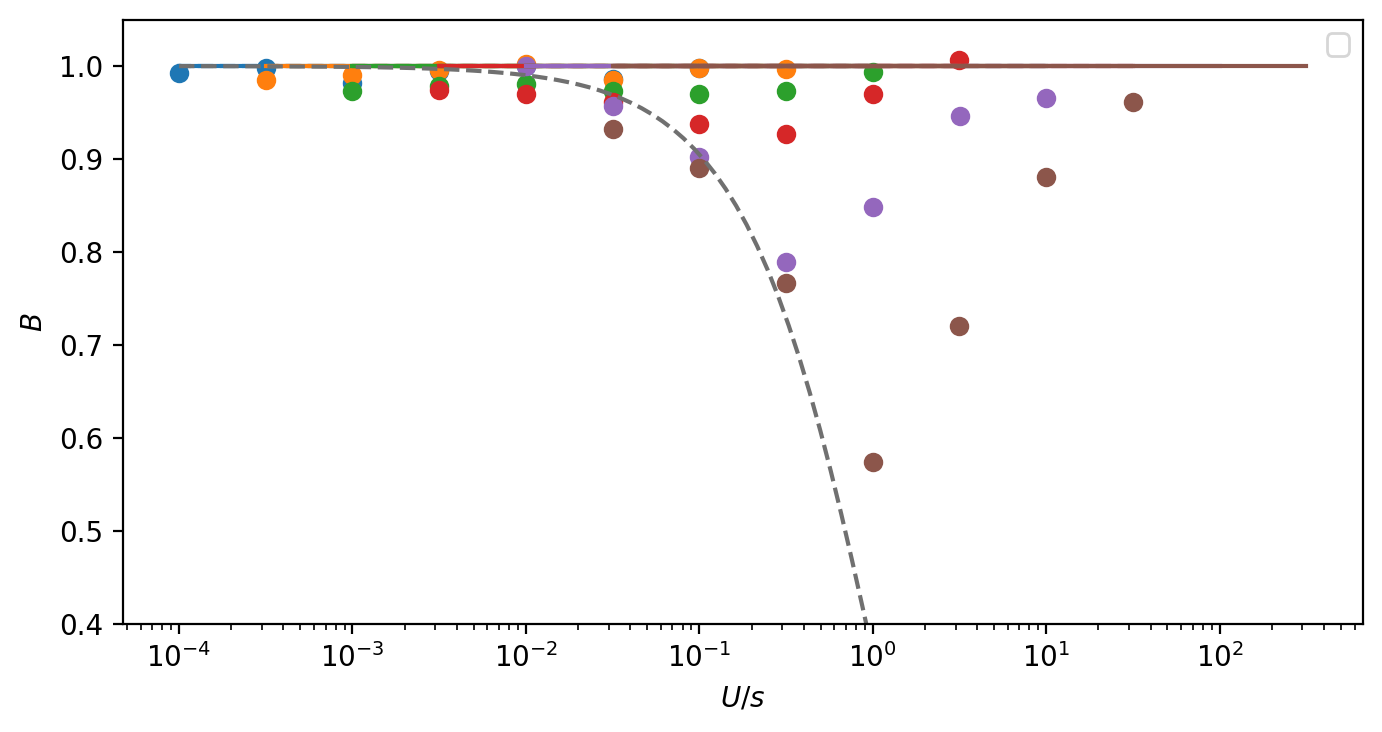

In [52]:
for mu in dg['mu'].unique():
    dgs = dg.loc[dg['mu'] == mu]
    sh = np.logspace(-5, -1, 100)
    #lines = plt.plot(mu/sh, bgs_segment_sc16p(mu, sh, L, rbp, N)/N, label=f"U = $10^{{{np.round(np.log10(mu), 2)}}}$")
    
    U = mu * L
    sh = dgs['sh'].values
    V = 2 * dgs['sh']**2 * dgs['ssh']
    #V = dgs['ssh'] * dgs['sh']**2 # dgs['f_sd']**2
    #V = dgs['f_sd']**2
    Vm = U*sh**2
    VmV = V/Vm
    Q2 = 1/(VmV * (VmV + L*rbp/2))
    res = bgs_segment_sc16(mu, sh, L, rbp, 2*N, return_both=True)
    V, Q2 = res[3], res[2]
    V = dgs['f_sd']**2 / 2 # FACTOR OF TWO
    lines = plt.plot(U/dgs['sh'], np.exp(-V * Q2), linestyle='dashed')
    
    plt.scatter(U/dgs['sh'], dgs['B'], c=lines[0].get_color()) 
    sh = np.logspace(-5, -1, 100)
    plt.plot(U/sh, 0.5 * bgs_segment_sc16(mu, sh, L, rbp, 2*N)/N, c=lines[0].get_color())
rate = np.logspace(-9, -3, 100)
plt.plot(L*rate, np.exp(-L * rate), linestyle='dashed', c='0.44')
    
plt.legend()
plt.semilogx()
plt.xlabel("$U/s$")
plt.ylabel("$B$")
plt.ylim(0.4, 1.05)

In [31]:
for mu in dg['mu'].unique():
    dgs = dg.loc[dg['mu'] == mu]
    sh = np.logspace(-5, -1, 100)
    lines = plt.plot(L*mu/sh, bgs_segment_sc16p(mu, sh, L, rbp, N)/N, label=f"U = $10^{{{np.round(np.log10(mu), 2)}}}$")
    
    U = mu * L
    sh = dgs['sh'].values
    V = 2 * dgs['sh']**2 * dgs['ssh']
    Vm = U*sh**2
    VmV = V/Vm
    Q2 = 1/(VmV * (VmV + L*rbp/2))
    #V = bgs_segment_sc16(mu, sh, L, rbp, N)[3]
    #lines = plt.plot(dgs['mu']/dgs['sh'], np.exp(-V * Q2), linestyle='dashed')
    
    plt.scatter(dgs['U']/dgs['sh'], dgs['B'], c=lines[0].get_color()) 
    
rate = np.logspace(-9, -3, 100)
plt.plot(L*rate, np.exp(-L * rate), linestyle='dashed', c='0.44')
    
plt.legend()
plt.semilogx()
plt.xlabel("$U/s$")
plt.ylabel("$B$")
plt.ylim(0.4, 1)

NameError: name 'bgs_segment_sc16p' is not defined

/home/vsb/projects/bprime/bgspy/theory.py:52: RuntimeWarning: invalid value encountered in log
  return [np.log((np.exp(2*sh*Ne) - 1)/(2*U*sh*Ne)) - np.log(T),
/home/vsb/projects/bprime/bgspy/theory.py:64: UserWarning: no solution found!
  warnings.warn("no solution found!")


[]

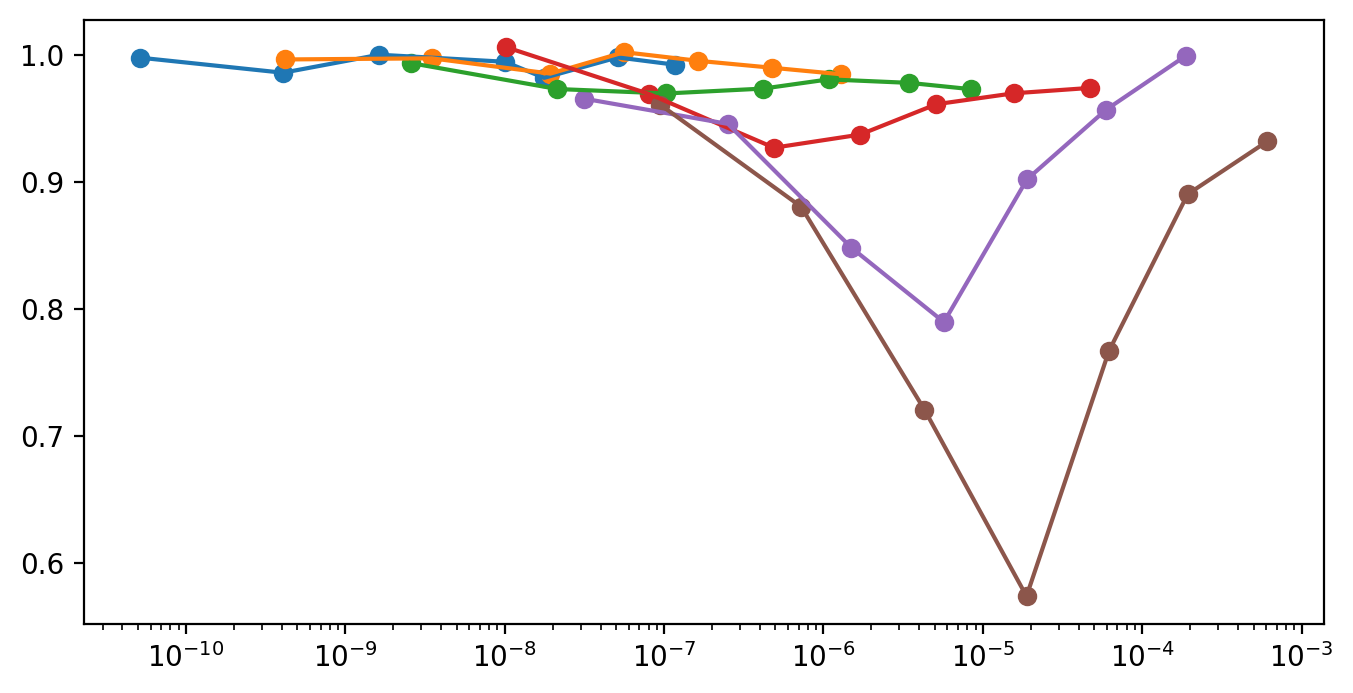

In [115]:
for u in dg['U'].unique():
    dgs = dg.loc[dg.U == u]
    lines = plt.plot(dgs['f_sd']**2, dgs['B'], label=u)
    plt.scatter(dgs['f_sd']**2, dgs['B'], c=lines[0].get_color())

T, Ne, _, V, *_ = bgs_segment_sc16(dg['mu'], dg['sh'], L, rbp, N, return_both=True)


#plt.scatter(dg['U'] / dg['sh'], V, c=np.log10(dg['sh']), marker='+')
plt.semilogx()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'predicted fitness variation')

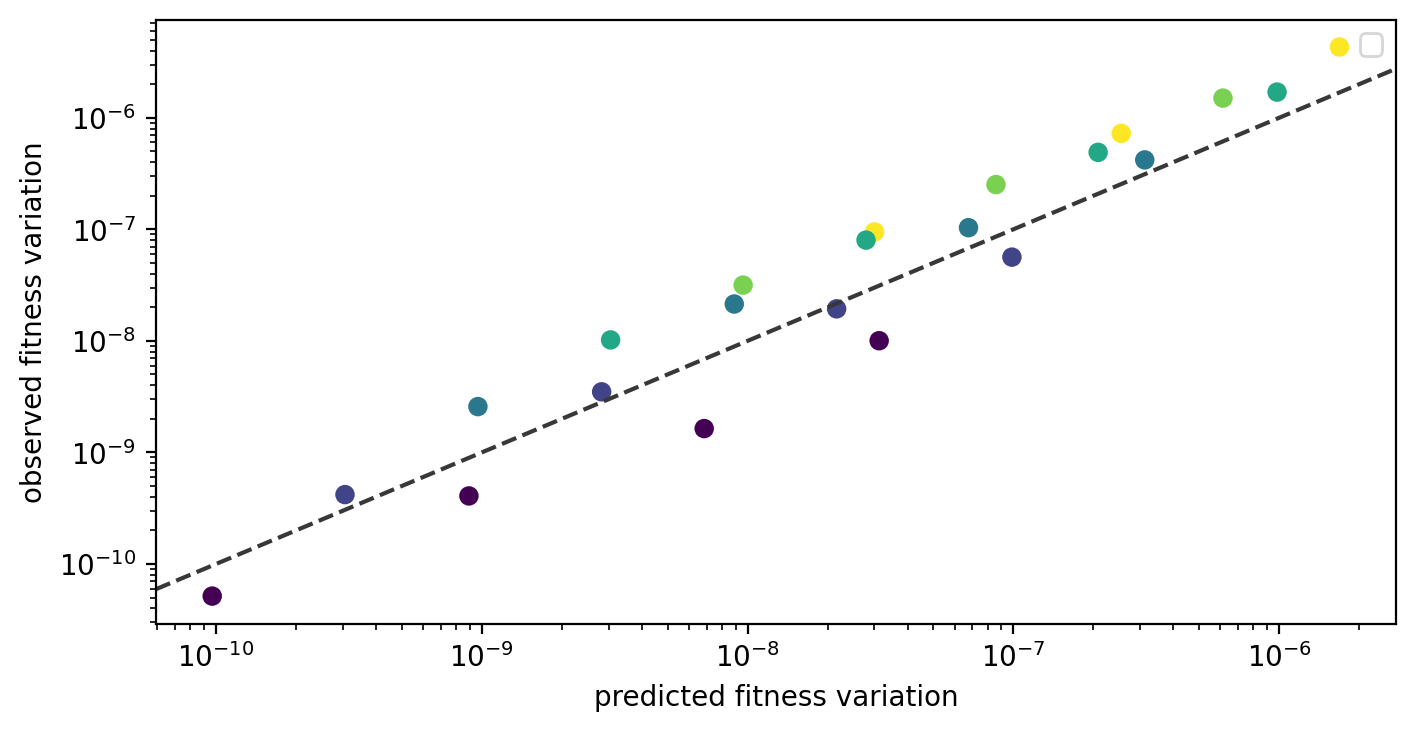

In [180]:
T, Ne, _, V, *_ = bgs_segment_sc16(dg['mu'], dg['sh'], L, rbp, N, return_both=True)
plt.scatter(V, dg['f_sd']**2, c=np.log10(dg['mu']))
plt.legend()
plt.axline((0, 0), slope=1, linestyle='dashed', c='0.22')
plt.loglog()
plt.ylabel('observed fitness variation')
plt.xlabel('predicted fitness variation')

Text(0.5, 0, 'predicted fitness variation')

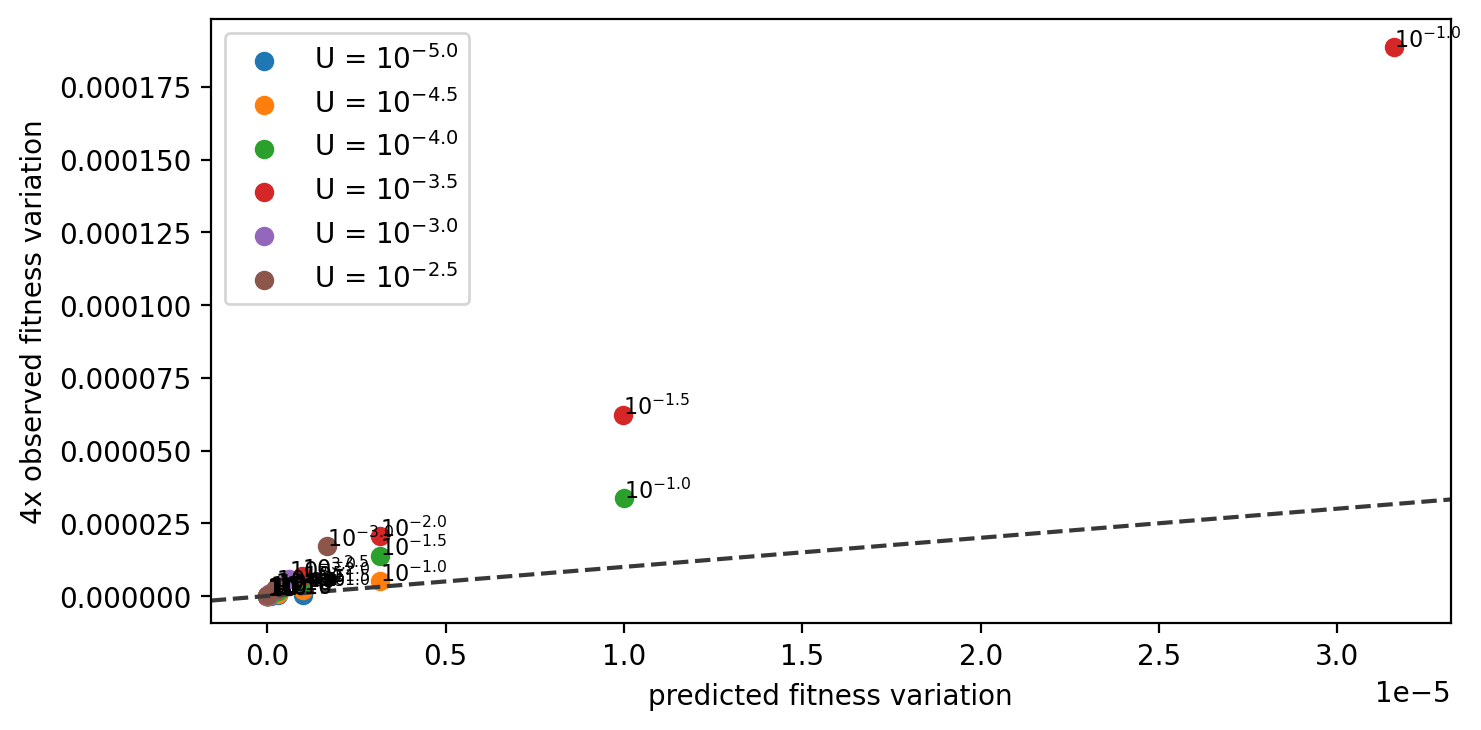

In [17]:
for u in dg['U'].unique():
    dgs = dg.loc[dg['U'] == u]

    T, Ne, _, V, *_ = bgs_segment_sc16(dgs['mu'], dgs['sh'], L, rbp, N, return_both=True)

    Vemp = 4 * dgs['f_sd'].values**2 
    
    plt.scatter(V, Vemp, label=f"U = $10^{{{np.round(np.log10(u), 2)}}}$")
    
    for i in range(len(V)):
        plt.annotate(f"$10^{{{np.round(np.log10(dgs['sh'].values[i]), 2)}}}$", (V[i], Vemp[i]), fontsize=8)
plt.legend()
plt.axline((0, 0), slope=1, linestyle='dashed', c='0.22')
#plt.loglog()
plt.ylabel('4x observed fitness variation')
plt.xlabel('predicted fitness variation')

### Fitness Variation

Let's look at empirical fitness variation versus predicted under S&C '16:

Text(0.5, 0, 'predicted fitness variation')

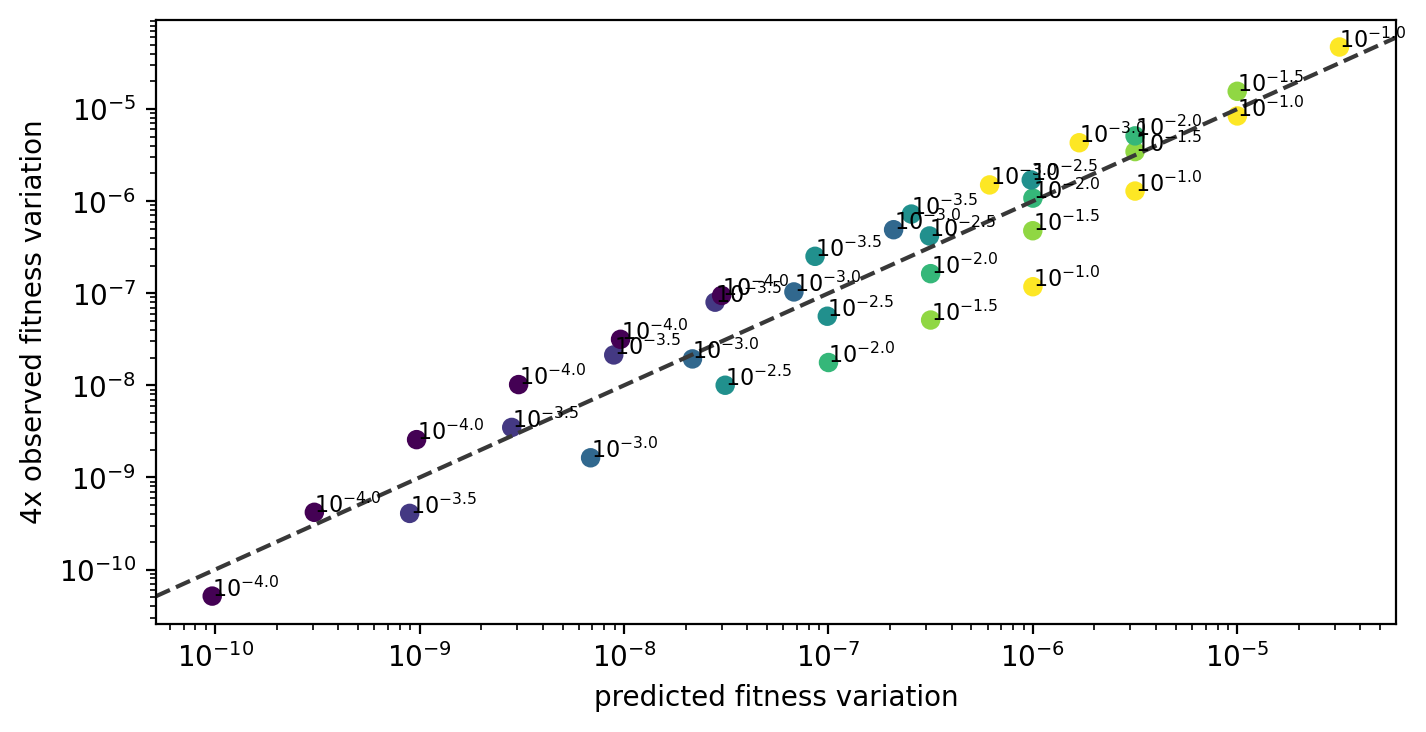

In [21]:
for u in dg['U'].unique():
    dgs = dg.loc[dg['U'] == u]

    T, Ne, _, V, *_ = bgs_segment_sc16(dgs['mu'], dgs['sh'], L, rbp, N, return_both=True)

    Vemp = dgs['f_sd'].values**2 
    #Vemp = dgs['sh'].values**2 * dgs['ssh'].values
    plt.scatter(V, Vemp, c = np.log10(dgs['sh']))
    
    for i in range(len(V)):
        plt.annotate(f"$10^{{{np.round(np.log10(dgs['sh'].values[i]), 2)}}}$", (V[i], Vemp[i]), fontsize=8)

plt.axline((0, 0), slope=1, linestyle='dashed', c='0.22')
plt.loglog()
plt.ylabel('4x observed fitness variation')
plt.xlabel('predicted fitness variation')

Now, let's look at at the genic variance. This is incredibly close; the disparity must be LD.

Text(0.5, 0, 'predicted fitness variation')

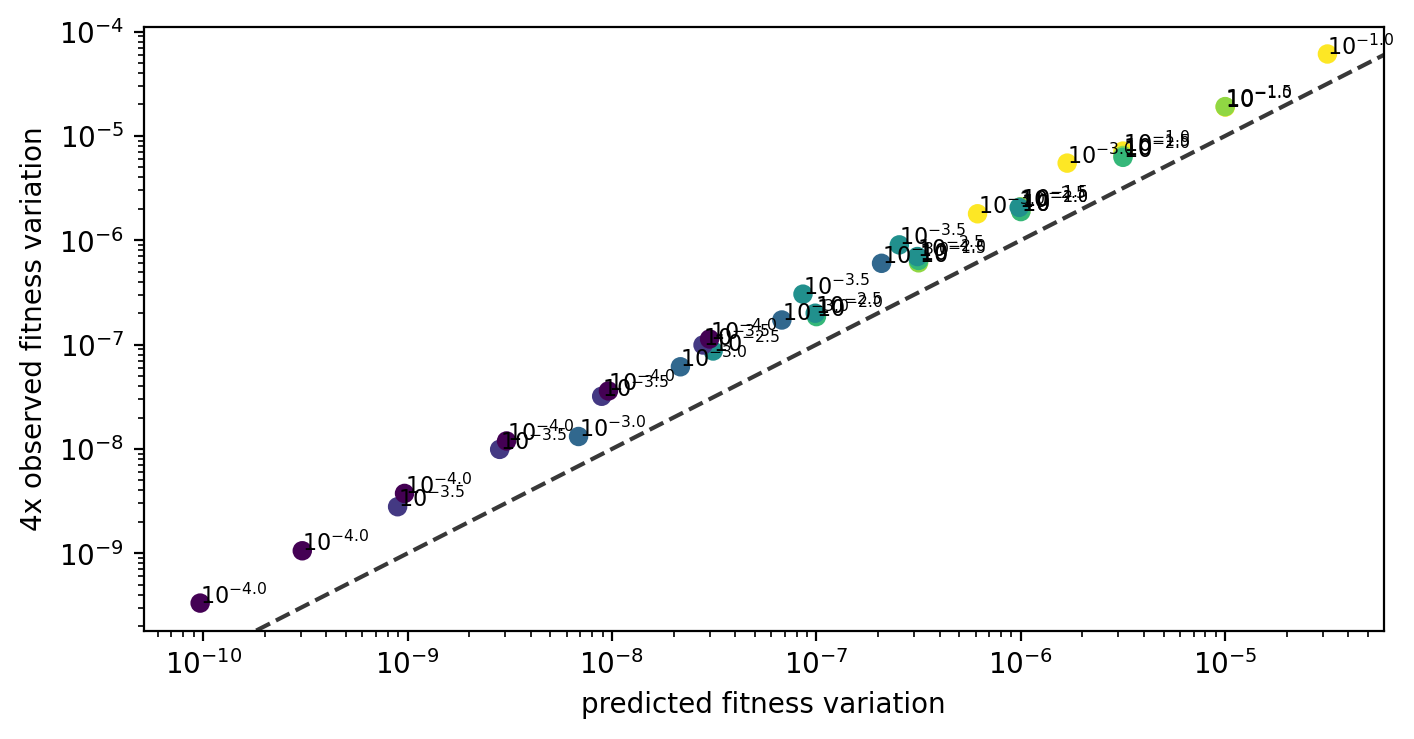

In [25]:
for u in dg['U'].unique():
    dgs = dg.loc[dg['U'] == u]

    T, Ne, _, V, *_ = bgs_segment_sc16(dgs['mu'], dgs['sh'], L, rbp, N, return_both=True)

    #Vemp = 4 * dgs['f_sd'].values**2 
    Vemp = dgs['sh'].values**2 * dgs['ssh'].values
    plt.scatter(V, Vemp, c = np.log10(dgs['sh']))
    
    for i in range(len(V)):
        plt.annotate(f"$10^{{{np.round(np.log10(dgs['sh'].values[i]), 2)}}}$", (V[i], Vemp[i]), fontsize=8)

plt.axline((0, 0), slope=1, linestyle='dashed', c='0.22')
plt.loglog()
plt.ylabel('4x observed fitness variation')
plt.xlabel('predicted fitness variation')

Text(0.5, 0, 'predicted fitness variation')

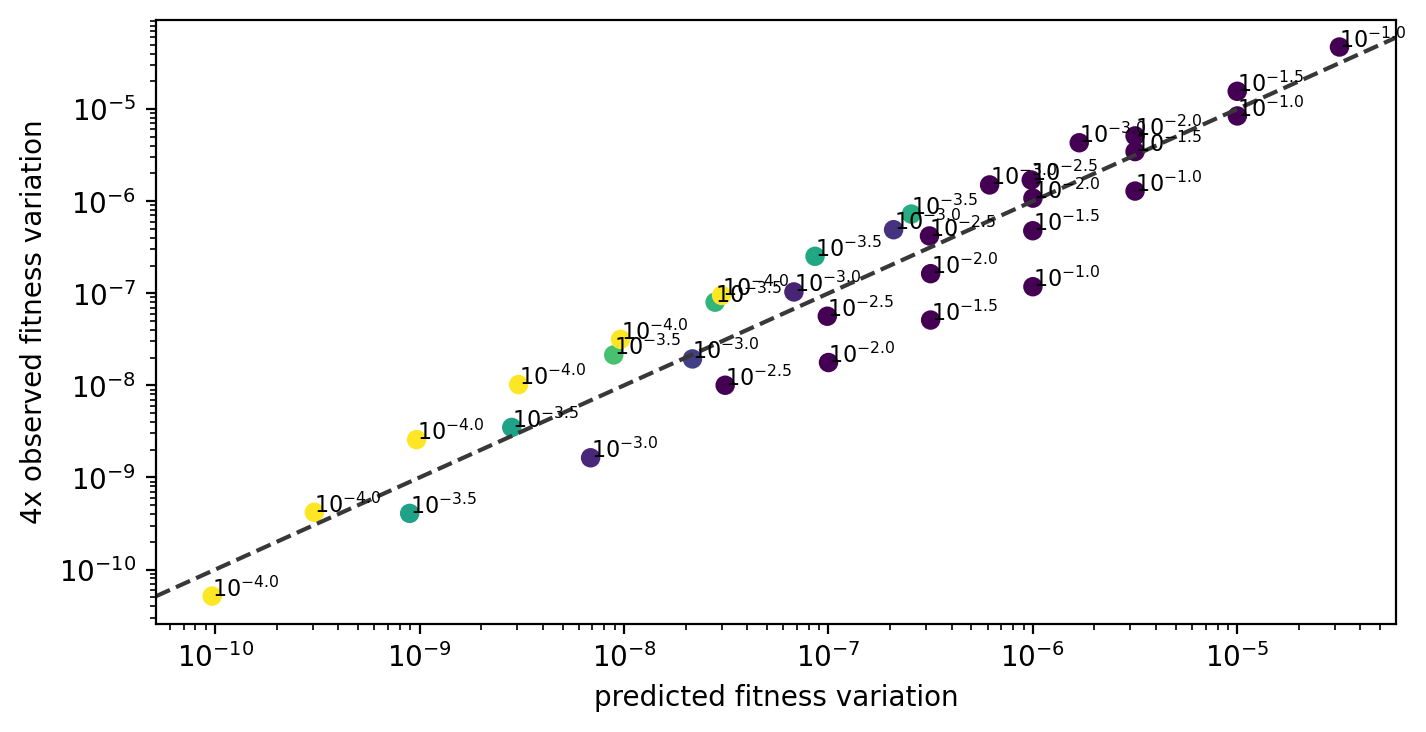

In [26]:
for u in dg['U'].unique():
    dgs = dg.loc[dg['U'] == u]

    T, Ne, _, V, *_ = bgs_segment_sc16(dgs['mu'], dgs['sh'], L, rbp, N, return_both=True)

    Vemp = dgs['f_sd'].values**2 
    #Vemp = 4 * dgs['sh'].values**2 * dgs['ssh'].values
    plt.scatter(V, Vemp, c = np.log10(0.1+dgs['R']))
    
    for i in range(len(V)):
        plt.annotate(f"$10^{{{np.round(np.log10(dgs['sh'].values[i]), 2)}}}$", (V[i], Vemp[i]), fontsize=8)

plt.axline((0, 0), slope=1, linestyle='dashed', c='0.22')
plt.loglog()
plt.ylabel('4x observed fitness variation')
plt.xlabel('predicted fitness variation')

Text(0.5, 0, 'genic - Va')

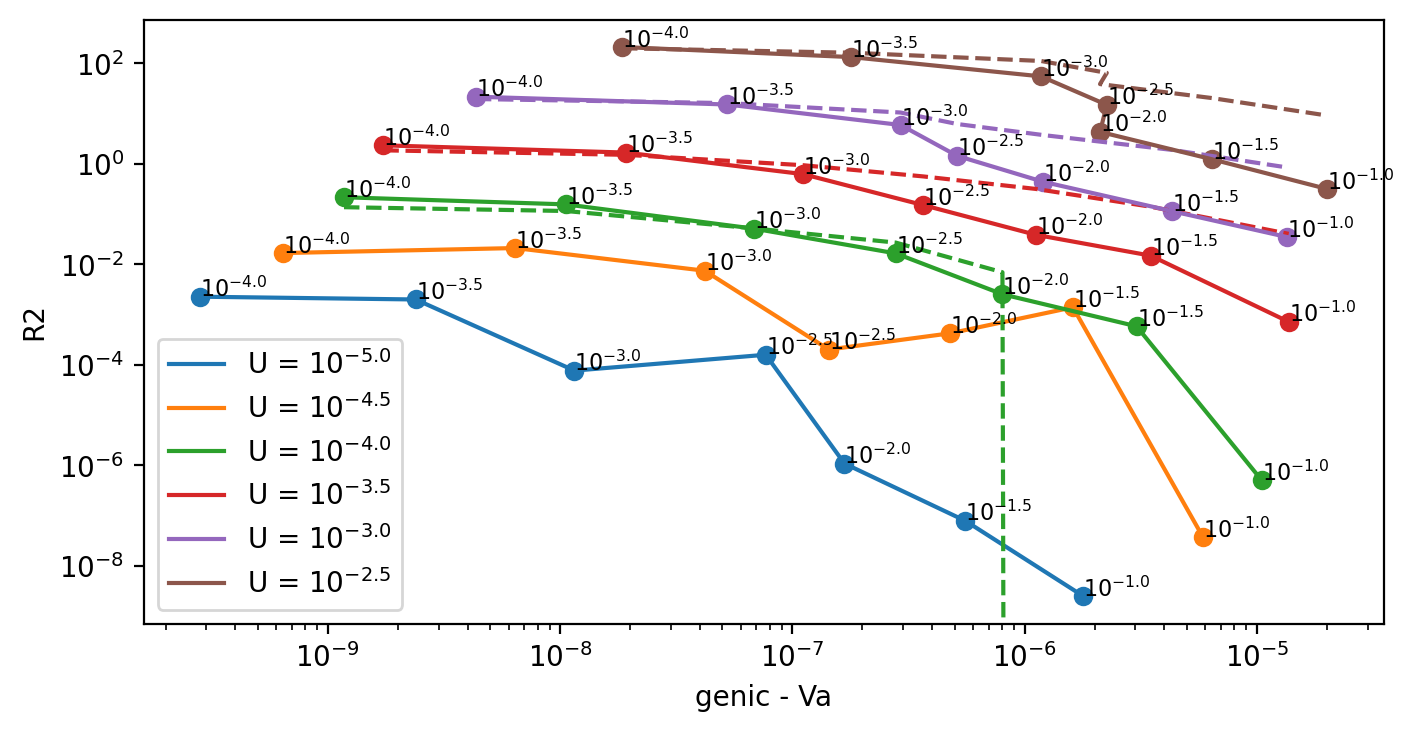

In [32]:
for u in dg['U'].unique():
    dgs = dg.loc[dg['U'] == u]

    #T, Ne, _, V, *_ = bgs_segment_sc16(dgs['mu'], dgs['sh'], L, rbp, N, return_both=True)

    Vemp = dgs['f_sd'].values**2 
    Vemp_ssh =  dgs['sh'].values**2 * dgs['ssh'].values
    
    Vdiff = np.abs(Vemp - Vemp_ssh)
    
    lines = plt.plot(Vdiff, dgs['r2sum'], label=f"U = $10^{{{np.round(np.log10(u), 2)}}}$")
    plt.scatter(Vdiff, dgs['r2sum'], c=lines[0].get_color())
    x = Vdiff 
    y = dgs['r2sum'].values
    for i in range(len(V)):
        plt.annotate(f"$10^{{{np.round(np.log10(dgs['sh'].values[i]), 2)}}}$", (x[i], y[i]), fontsize=8)
    n = dgs['ldn']
    multiplier = n * (n-1) * 32
    
    rate = dgs['U'] / dgs['sh']
    #scaler = np.exp(-rate)
    scaler = 1
    plt.plot(Vdiff, neutral_ld(L, rbp, N*scaler) * multiplier, linestyle='dashed', c=lines[0].get_color())
#plt.axline((0, 0), slope=1, linestyle='dashed', c='0.22')
plt.legend()
plt.loglog()
plt.ylabel('R2')
plt.xlabel('genic - Va')

[]

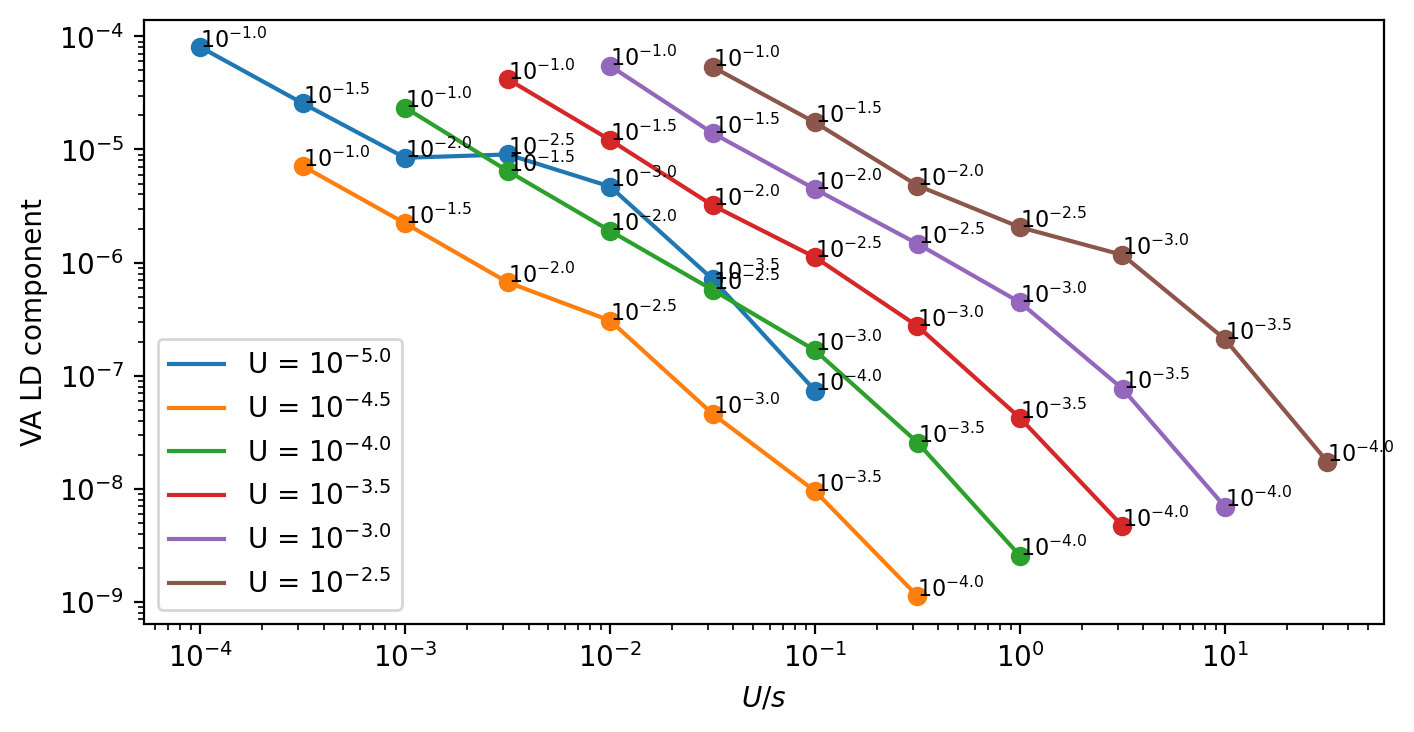

In [66]:
for u in dg['U'].unique():
    dgs = dg.loc[dg['U'] == u]

    #T, Ne, _, V, *_ = bgs_segment_sc16(dgs['mu'], dgs['sh'], L, rbp, N, return_both=True)

    Vdiff = Vemp_ssh - Vemp
    Vemp = 4 * dgs['f_sd'].values**2 
    Vemp_ssh = 4 * dgs['sh'].values**2 * dgs['ssh'].values
    x = L * dgs['mu'].values/dgs['sh'].values
    lines = plt.plot(x, Vdiff, label=f"U = $10^{{{np.round(np.log10(u), 2)}}}$")
    plt.scatter(x, Vdiff, c=lines[0].get_color())
    y = Vdiff
    for i in range(len(V)):
        plt.annotate(f"$10^{{{np.round(np.log10(dgs['sh'].values[i]), 2)}}}$", (x[i], y[i]), fontsize=8)
        
plt.legend()
plt.ylabel('VA LD component')    
plt.xlabel('$U/s$')
plt.loglog()

Text(0.5, 0, 'genic - Va')

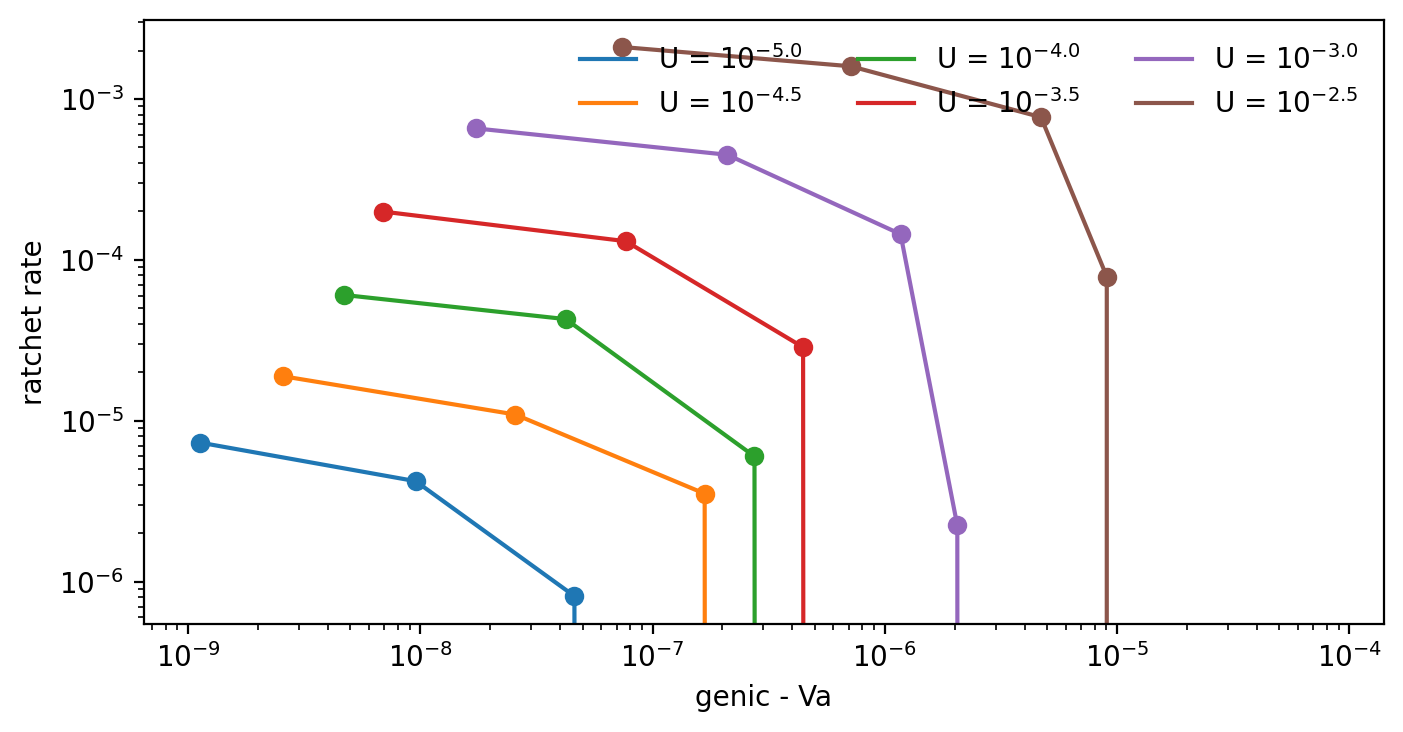

In [33]:
for u in dg['U'].unique():
    dgs = dg.loc[dg['U'] == u]

    #T, Ne, _, V, *_ = bgs_segment_sc16(dgs['mu'], dgs['sh'], L, rbp, N, return_both=True)

    Vemp = 4 * dgs['f_sd'].values**2 
    Vemp_ssh = 4 * dgs['sh'].values**2 * dgs['ssh'].values
    vald = Vemp_ssh - Vemp
    #y = Vemp - Vemp_ssh 
    lines = plt.plot(vald, dgs['R'], label=f"U = $10^{{{np.round(np.log10(u), 2)}}}$")
    plt.scatter(vald, dgs['R'], c=lines[0].get_color())

#plt.axline((0, 0), slope=1, linestyle='dashed', c='0.22')
plt.loglog()
plt.legend(ncol=3, frameon=False)
plt.ylabel('ratchet rate')
plt.xlabel('genic - Va')

Text(0.5, 0, 'R')

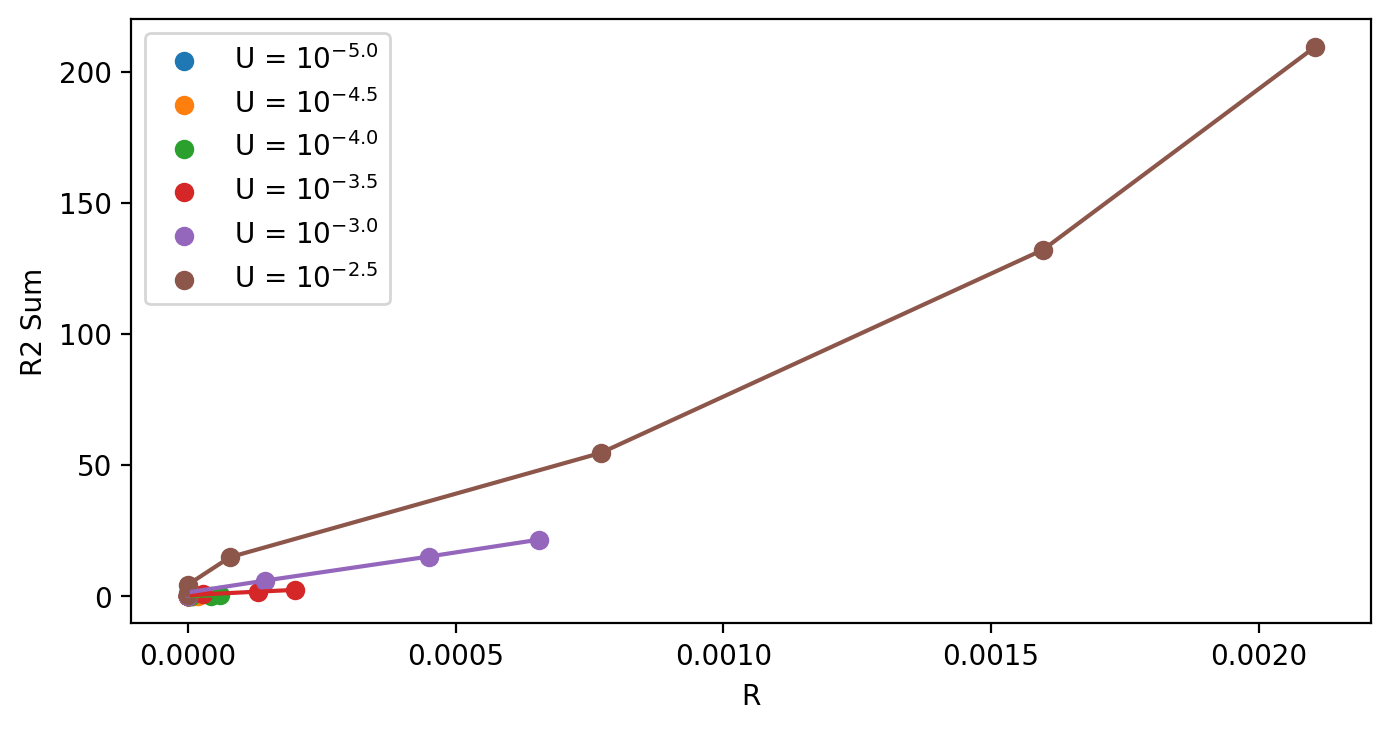

In [89]:
for u in dg['U'].unique():
    dgs = dg.loc[dg['U'] == u]
    plt.plot(dgs['R'], dgs['r2sum'])
    plt.scatter(dgs['R'], dgs['r2sum'], label=f"U = $10^{{{np.round(np.log10(u), 2)}}}$")
plt.legend()
#plt.semilogx()
plt.ylabel('R2 Sum')
plt.xlabel('R')

## Notes on heterozygosity

S&C (1995, 2016) use a strange heterozygosity that I cannot find a good approximation to. Theirs is:


$$
H \approx 2 \mu \sum_{i=1}^\infty \prod_{t=1}^i \left(1-\frac{1}{2 N_e(t)} \right)
$$


The expected pairwise diversity under a coalescent model would be, 

$$
 \mathrm{E}(\pi) = 2 \mu \sum_{i=1}^\infty \frac{i}{2 N_e(t)}\prod_{t=1}^{i-1} \left(1-\frac{1}{2 N_e(t)}\right)
$$

Which is similar to the heterozygosity at a locus, 

$$ 
 \mathcal{H} = 1 - \sum_{i=1}^\infty  \frac{(1-\mu)^{2i}}{2 N_e(t)}\prod_{t=1}^{i-1} \left(1-\frac{1}{2 N_e(t)}\right)
$$


In [4]:
def random_Ne(center, scale, n=10):
    x = np.random.normal(center, scale, int(center*n)).astype(int)
    assert all(x > 0)
    return x

In [5]:
def H(Ne, mu):
    return 1-np.sum([0.5*((1-mu)**(2*i))/Ne[i] * np.prod((1-0.5/Ne[:(i-1)])) for i in range(len(Ne))])

def SC16_H(Ne, mu):
    return 2*mu * np.sum([np.prod((1-0.5/Ne[:i])) for i in range(len(Ne))])

def coal_H(Ne, mu):
    return 2*mu * np.sum([i/Ne[i] * np.prod((1-0.5/Ne[:(i-1)])) for i in range(len(Ne))])

In [6]:
Ne = random_Ne(1000, 100)

mu = 1e-8

H(Ne, mu), SC16_H(Ne, mu), coal_H(Ne, mu)

(0.006460383551897819, 3.933703371162901e-05, 7.612125319053593e-05)

The coalescent and S&C heterozygosities are relatively close; the classic heterozygosity is off.

In [7]:
mu = 1e-5

H(Ne, mu), SC16_H(Ne, mu), coal_H(Ne, mu)

(0.04315004763483077, 0.03933703371162901, 0.07612125319053595)

Note though, that when mutation rate are higher (e.g. in a locus), the values are comparable.

Text(0.5, 0, 'ratchet rate')

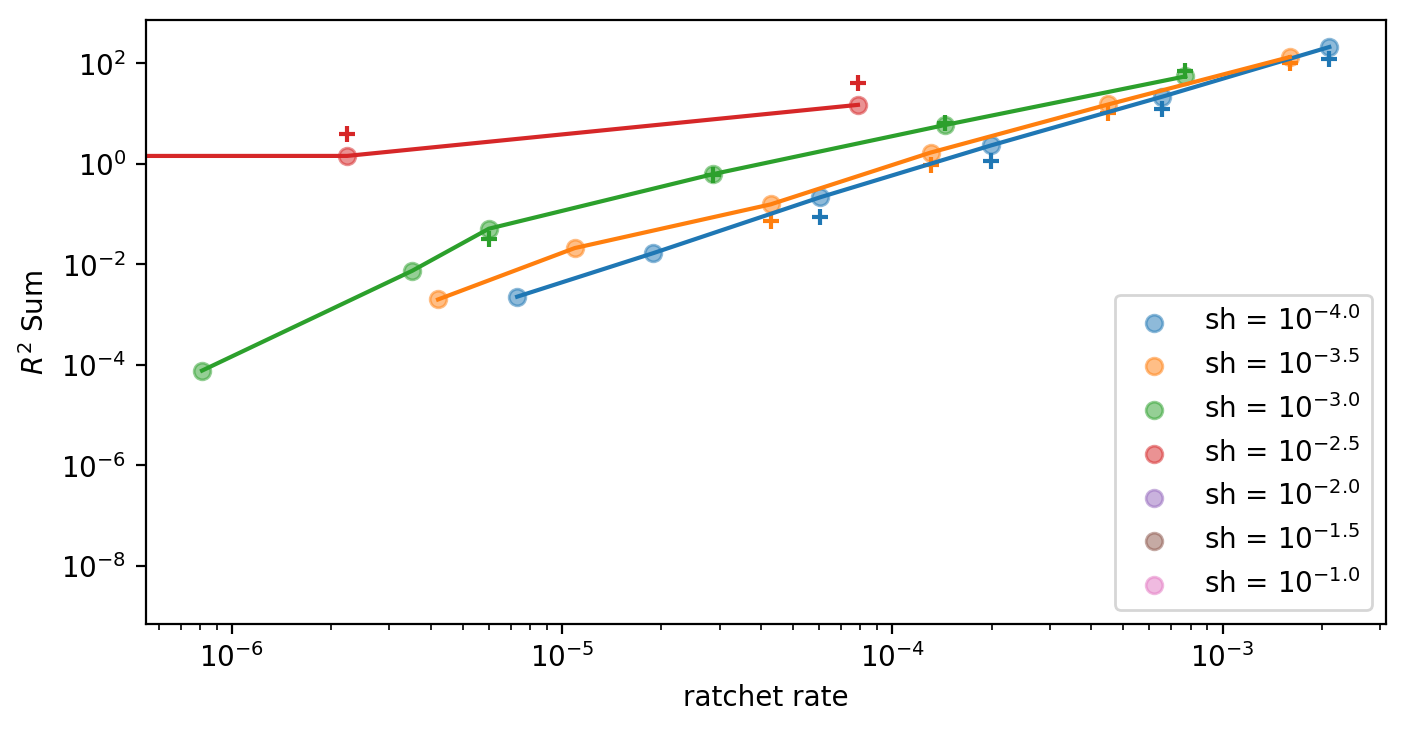

In [91]:
L = 1000000

for s in dg['sh'].unique():
    dgs = dg.loc[dg['sh'] == s]
    lines = plt.plot(dgs['R'], dgs['r2sum'])
    plt.scatter(dgs['R'], dgs['r2sum'], label=f"sh = $10^{{{np.round(np.log10(s), 2)}}}$", alpha=0.5)
    n = dgs['ldn']
    # NOTE: factor of two!
    plt.scatter(dgs['R'], neutral_ld(L, 1e-8, 1000) * 2 * n * (n-1), c=lines[0].get_color(), marker='+')
plt.legend()
plt.loglog()
plt.ylabel('$R^2$ Sum')
plt.xlabel('ratchet rate')

[]

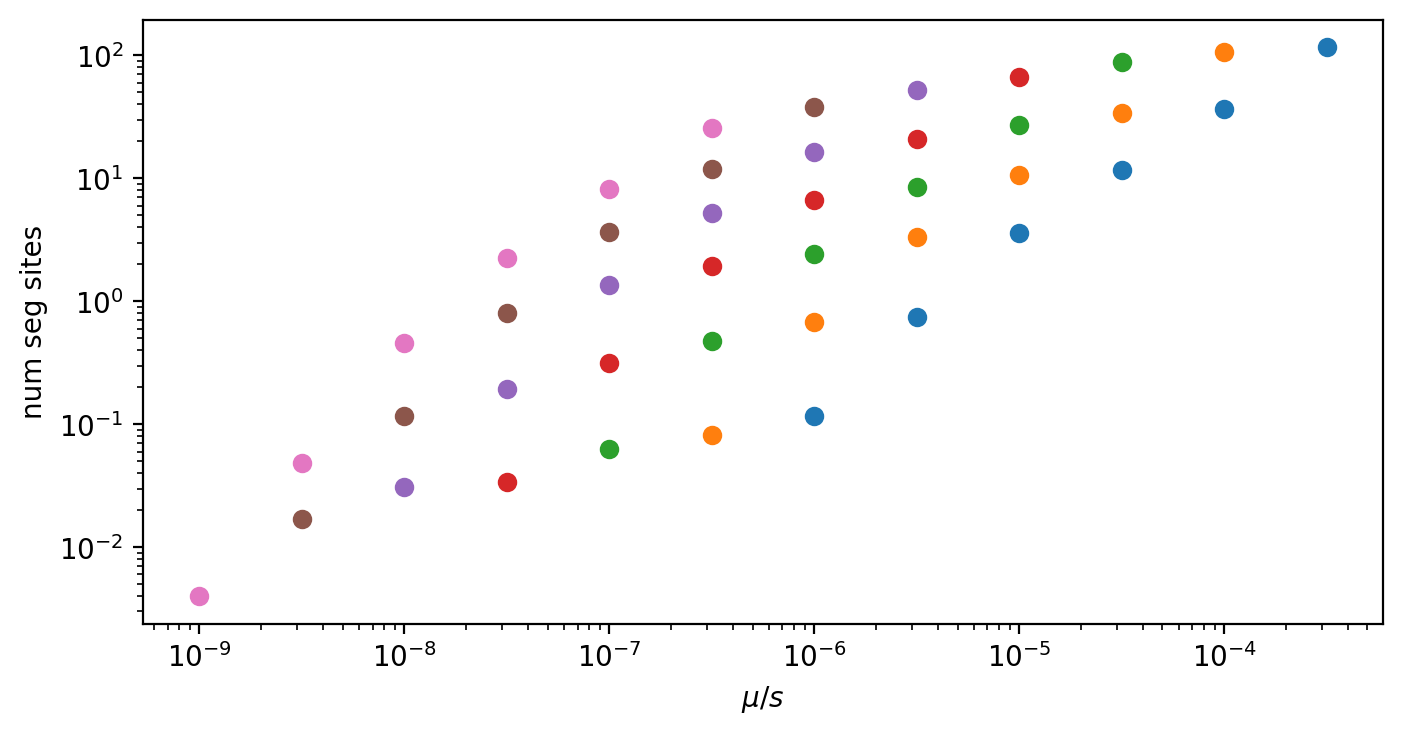

In [92]:
for s in dg['sh'].unique():
    dgs = dg.loc[dg['sh'] == s]
    plt.scatter(dgs['mu']/dgs['sh'], dgs['ldn'])
    #plt.plot(dgs['mu']/dgs['sh'], dgs['mu']/dgs['sh'])
plt.xlabel('$\mu/s$')
plt.ylabel('num seg sites')
plt.loglog()

[]

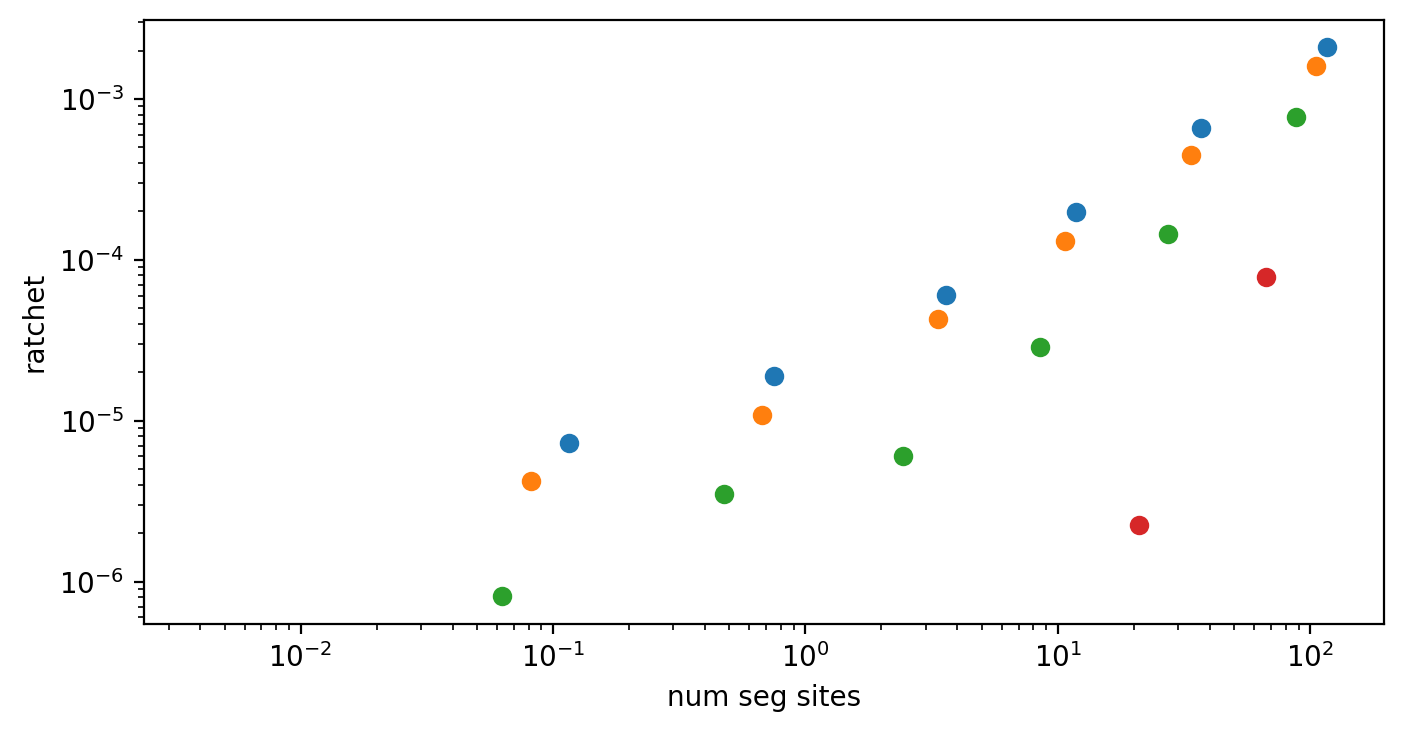

In [93]:
for s in dg['sh'].unique():
    dgs = dg.loc[dg['sh'] == s]
    plt.scatter(dgs['ldn'], dgs['R'])
    #plt.plot(dgs['mu']/dgs['sh'], dgs['mu']/dgs['sh'])
plt.xlabel('num seg sites')
plt.ylabel('ratchet')
plt.loglog()

Text(0.5, 0, 'R')

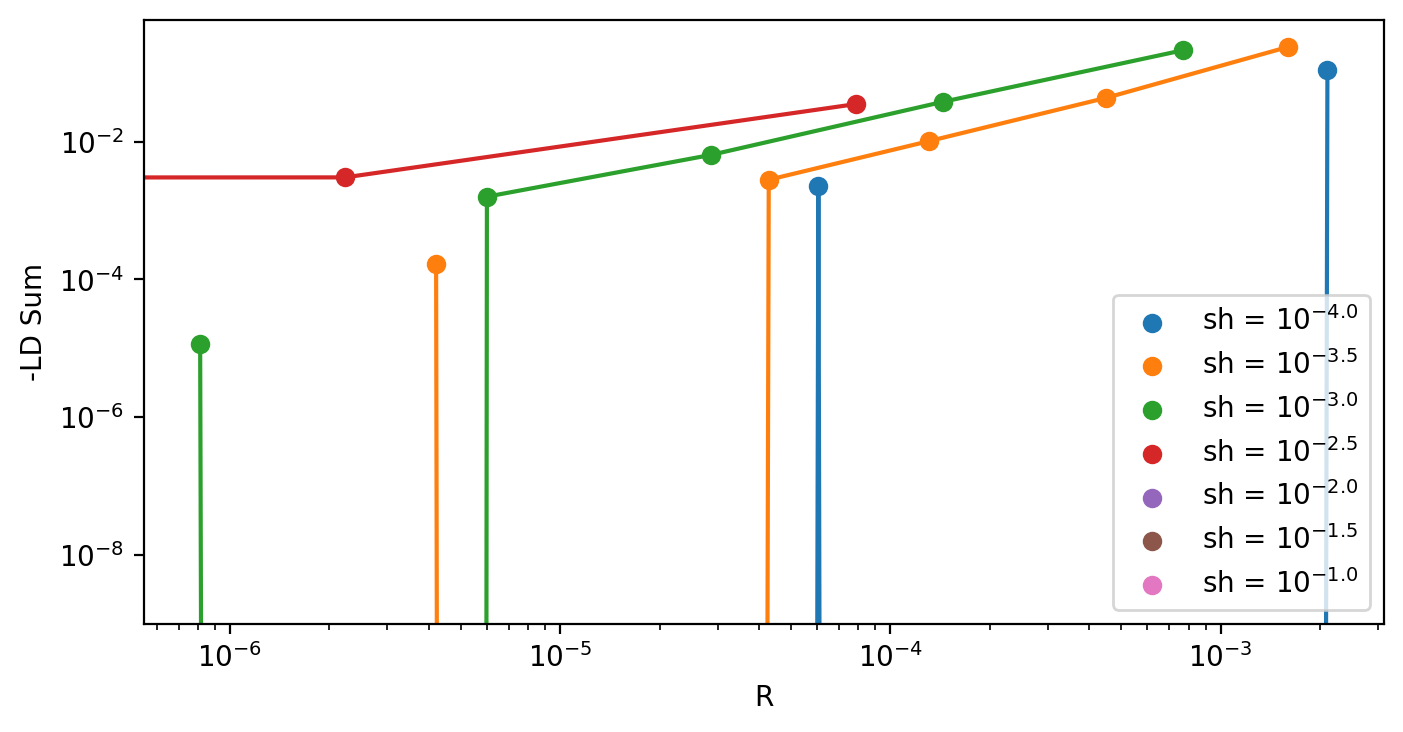

In [94]:

for s in dg['sh'].unique():
    dgs = dg.loc[dg['sh'] == s]
    lines = plt.plot(dgs['R'], -dgs['ldsum'])
    plt.scatter(dgs['R'], -dgs['ldsum'], label=f"sh = $10^{{{np.round(np.log10(s), 2)}}}$")
    n = dgs['ldn']
    #plt.scatter(dgs['R'], neutral_ld(L, 1e-8, 1000) * 2 * n * (n-1), c=lines[0].get_color(), alpha=0.1)
plt.legend()
plt.loglog()
plt.ylabel('-LD Sum')
plt.xlabel('R')

Text(0.5, 0, 'ratchet rate')

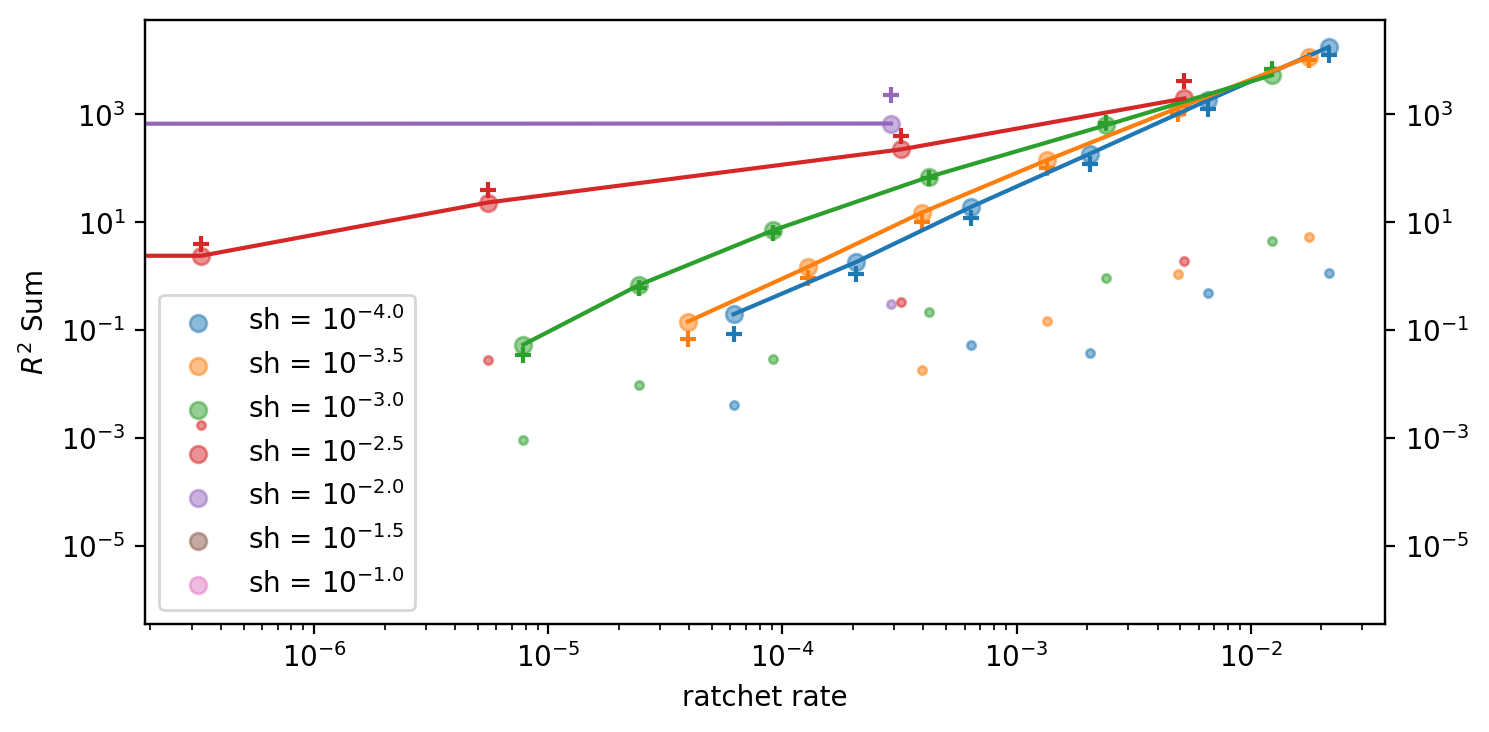

In [105]:
L = 1000000

f, ax = plt.subplots()
ax2 = ax.twinx()

for s in dg['sh'].unique():
    dgs = dg.loc[dg['sh'] == s]
    lines = plt.plot(dgs['R'], dgs['r2sum'])
    ax.scatter(dgs['R'], dgs['r2sum'], label=f"sh = $10^{{{np.round(np.log10(s), 2)}}}$", alpha=0.5)
    n = dgs['ldn']
    # NOTE: factor of two!
    ax.scatter(dgs['R'], neutral_ld(L, 1e-8, 1000) * 2 * n * (n-1), c=lines[0].get_color(), marker='+')
    
    ax2.scatter(dgs['R'], -dgs['ldsum'], label=f"sh = $10^{{{np.round(np.log10(s), 2)}}}$", marker='.', alpha=0.5)
ax.legend()
ax.loglog()
ax2.loglog()

ax.set_ylabel('$R^2$ Sum')
ax.set_xlabel('ratchet rate')